<a href="https://colab.research.google.com/github/Shyamu431/Project-Netflix/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><span style="color:red">NETFLIX</span>

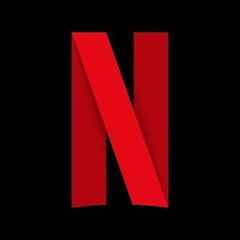




****
****

#### Need to analyze the data and generate insights on the basis of which give recommendations to Netflix, which includes what types of movies/shows to produce and how to expand the business in different countries.

You can download the dataset from [here](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Downloading the dataset from the link using gdown tool

In [41]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O Netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/Netflix.csv
100% 3.40M/3.40M [00:00<00:00, 21.3MB/s]


##### Reading Netflix file using read_csv function of pandas and creating a dataframe named as df

In [42]:
original = pd.read_csv('Netflix.csv')

---

## Exploratory Data Analyis

In [43]:
original.shape

(8807, 12)

In [44]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [45]:
original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Concise Summary of DataFrame
**This includes total number of rows and columns present in the DataFrame, name of columns and their data types.It also shows number of Nonenull values in each columns.**


*Overall, there are 8807 rows and 12 columns in the given data set*

In [46]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### describe() method shows the statistical summmary of the whole DataFrame

In [47]:
original.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [48]:
original.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


##### Checking duplicates values

In [49]:
np.any(original.duplicated())

False

From above, we can see that there is no duplicate values present in our original data set.

___

##### Copy Original DataFrame set to different DataFrame

In [50]:
df = original.copy()

In [51]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [52]:
df['date_added'] = pd.to_datetime(df.date_added)
df['year_add'] = df.date_added.dt.year

In [53]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


##### Changing data type of ***type*** and ***rating*** columns into category

In [54]:
df.type = df.type.astype('category')

In [55]:
df.rating = df.rating.astype('category')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_add      8797 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 775.0+ KB


##### Earliest released movies

In [57]:
df.release_year.min()

1925

In [58]:
df.query('release_year == 1925')[['title','release_year']]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925


##### Earliest movie and year in which it was added on the Netflix

In [59]:
pd.to_datetime(df.date_added).dt.year.min()

2008.0

In [60]:
df.query('year_add == 2008')[['title','year_add']]

,title,year_add
5957,To and From New York,2008.0
6611,Dinner for Five,2008.0


***

#### Value counts of few attributes

In [61]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [62]:
df.title.value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

In [63]:
pd.DataFrame(df[['title']].value_counts())

,0
title,
#Alive,1
Riphagen - The Untouchable,1
Rilakkuma and Kaoru,1
Rim of the World,1
Rimba Racer,1
...,...
Happy Endings,1
Happy Anniversary,1
Happy And,1


In [64]:
pd.DataFrame(df[['director']].value_counts())

,0
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
...,...
Jos Humphrey,1
Jose Gomez,1
Jose Javier Reyes,1


In [65]:
pd.DataFrame(df[['country']].value_counts())

,0
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India",1
"Ireland, Canada, United Kingdom, United States",1
"Ireland, Canada, United States, United Kingdom",1


In [66]:
pd.DataFrame(df[['rating']].value_counts())

,0
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [67]:
pd.DataFrame(df[['year_add']])

,year_add
0,2021.0
1,2021.0
2,2021.0
3,2021.0
4,2021.0
...,...
8802,2019.0
8803,2019.0
8804,2019.0
8805,2020.0


In [68]:
pd.DataFrame(df[['listed_in']].value_counts())

,0
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Cult Movies, Dramas, International Movies",1
"Cult Movies, Dramas, Music & Musicals",1
"Cult Movies, Dramas, Thrillers",1


____

**Number of Unique values present in each columns of the DataFrame**

In [69]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
year_add          14
dtype: int64

**Number of null values in each columns**

In [70]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_add          10
dtype: int64

##### % of Null Values in each Columns

*The below values shows that nearly 30% of data in director column is missing*

In [71]:
null_values = 100*(df.isna().sum())/len(df.index)
null_values = pd.DataFrame(null_values).reset_index()
null_values.columns=["Column's Name",'Null Percentage']

In [72]:
null_values

,Column's Name,Null Percentage
0,show_id,0.000000
1,type,0.000000
2,title,0.000000
3,director,29.908028
4,cast,9.367549
5,country,9.435676
6,date_added,0.113546
7,release_year,0.000000
8,rating,0.045418
9,duration,0.034064


#### ScatterPlot showing percentage of Null values in each columns

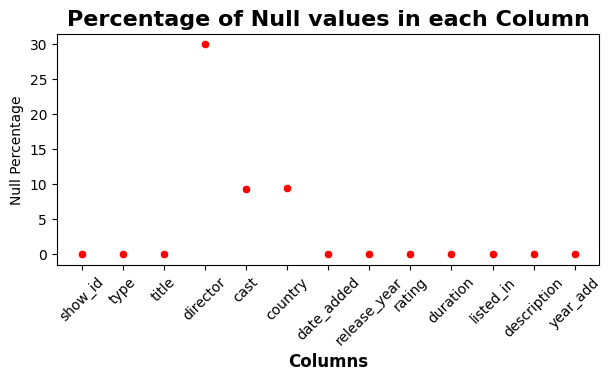

In [73]:
plt.figure(figsize=(7,3))
sns.scatterplot(x="Column's Name",y='Null Percentage',data=null_values,color='r')
plt.xticks(rotation=45)
plt.title('Percentage of Null values in each Column',fontsize=16,weight='bold')
plt.xlabel("Columns",fontsize=12,weight='bold')
plt.show()

**The percentage of missing values in case of director is very high, deleting this would make our observation skewed.**

____

## Analysing Release Year and types

In [74]:
df.query('year_add.isna()')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN


*We have missing date_added/year_add data correspoding to release year 2003, 2008, 2010, 2012, 2013, 2015, 2016, 2018*

____

In [75]:
temp = df[['release_year','year_add','type']]
temp['diff'] = temp.loc[:,'year_add'] - temp.loc[:,'release_year']

<ipython-input-75-662909d17261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['diff'] = temp.loc[:,'year_add'] - temp.loc[:,'release_year']


In [76]:
temp

,release_year,year_add,type,diff
0,2020,2021.0,Movie,1.0
1,2021,2021.0,TV Show,0.0
2,2021,2021.0,TV Show,0.0
3,2021,2021.0,TV Show,0.0
4,2021,2021.0,TV Show,0.0
...,...,...,...,...
8802,2007,2019.0,Movie,12.0
8803,2018,2019.0,TV Show,1.0
8804,2009,2019.0,Movie,10.0
8805,2006,2020.0,Movie,14.0


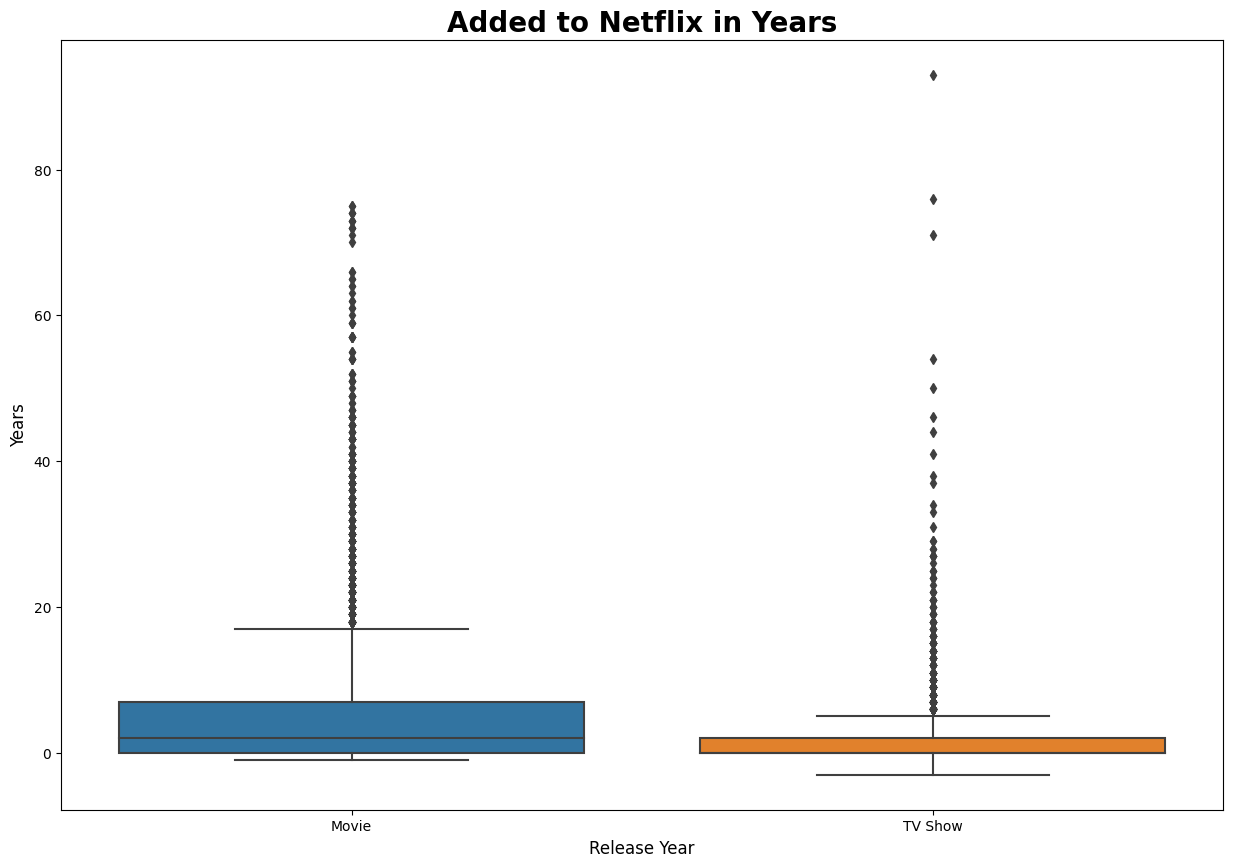

In [77]:
fg = plt.figure(figsize=(15,10))

sns.boxplot(data=temp,x='type',y='diff')
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Years',fontsize=12)
plt.title('Added to Netflix in Years',fontsize=20,weight='bold')
plt.show()

- [x] Insights
> Nearly 50% of movies added to to platform within 1 to 3 Years of release, Whereas, Nearly 75% of Movies added to Netflix before 10 years.

> In case of TV Shows, Nearly 75% of shows are added before 3 to 4 years.

____

-------

In [78]:
df_copy = df.copy()

#### Movies/TV Show released per year

In [79]:
df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


##### Percentage of Movie/TV Show

In [80]:
# Total number of movies and tv shows
Total = len(df_copy.index)

In [81]:
# Total number of movies
Num_of_Movie = len(df_copy.query("type=='Movie'").index)

In [82]:
# Total number of tv shows
Num_of_Show = len(df_copy.query("type=='TV Show'").index)

In [83]:
# Movie Percentage
movie_per = 100*Num_of_Movie/Total
f"{round(movie_per,2)}%"

'69.62%'

In [84]:
# TV Show Percentage
show_per = 100*Num_of_Show/Total
f"{round(show_per,2)}%"

'30.38%'

##### Percentage increase of movie/tv show released from 1990 to 2021

In [85]:
#Percentage increase of movies
movie_90 = df_copy.query("type=='Movie'").query('release_year==1990')
total_90 = len(movie_90)
total_90

19

In [86]:
movie_21 = df_copy.query("type=='Movie'").query('release_year==2021')
total_21 = len(movie_21)
total_21

277

In [88]:
# Percentage increment
per_movie = 100*(total_21-total_90)/total_90
round(per_movie,2)

1357.89

In [89]:
show_90 = df_copy.query("type=='TV Show'").query('release_year==1990')
total_90 = len(show_90)
total_90

3

In [90]:
show_21 = df_copy.query("type=='TV Show'").query('release_year==2021')
total_21=len(show_21)
total_21

315

In [91]:
# Percentage increase of TV shows
per_show = 100*(total_21-total_90)/total_90
round(per_show,2)

10400.0

> **Percentage wise increase of Movies -> 1357.89 %**

> **Percentage wise increase of TV Shows -> 10400 %**

In [92]:
year = df_copy.release_year.value_counts().index
val = df_copy.release_year.value_counts().values

#### Univariate analysis using bar, countplot, displot and kdeplot between shows vs movies

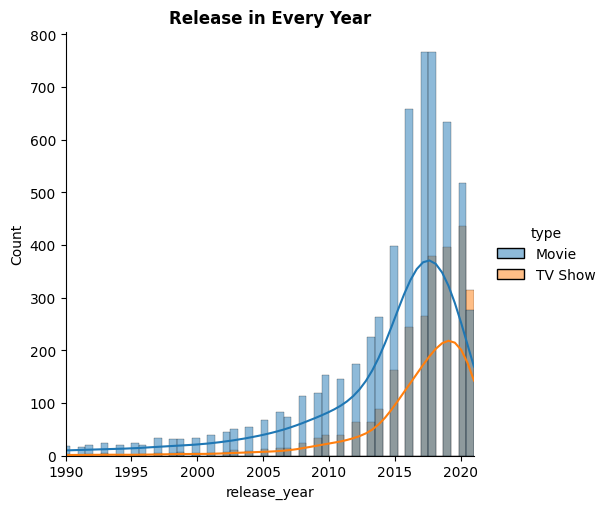

In [93]:
sns.displot(df_copy,x='release_year',hue='type',kde=True)
plt.xlim(1990,2021)
plt.title('Release in Every Year',fontsize=12,weight='bold')
plt.show()

Text(0.5, 1.0, 'Movies and TV Show Counts')

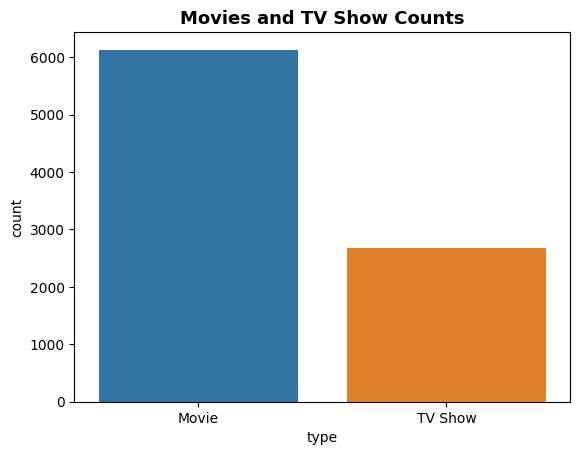

In [94]:
sns.countplot(x='type',data=df_copy)
plt.title('Movies and TV Show Counts',fontsize=13,weight='bold')

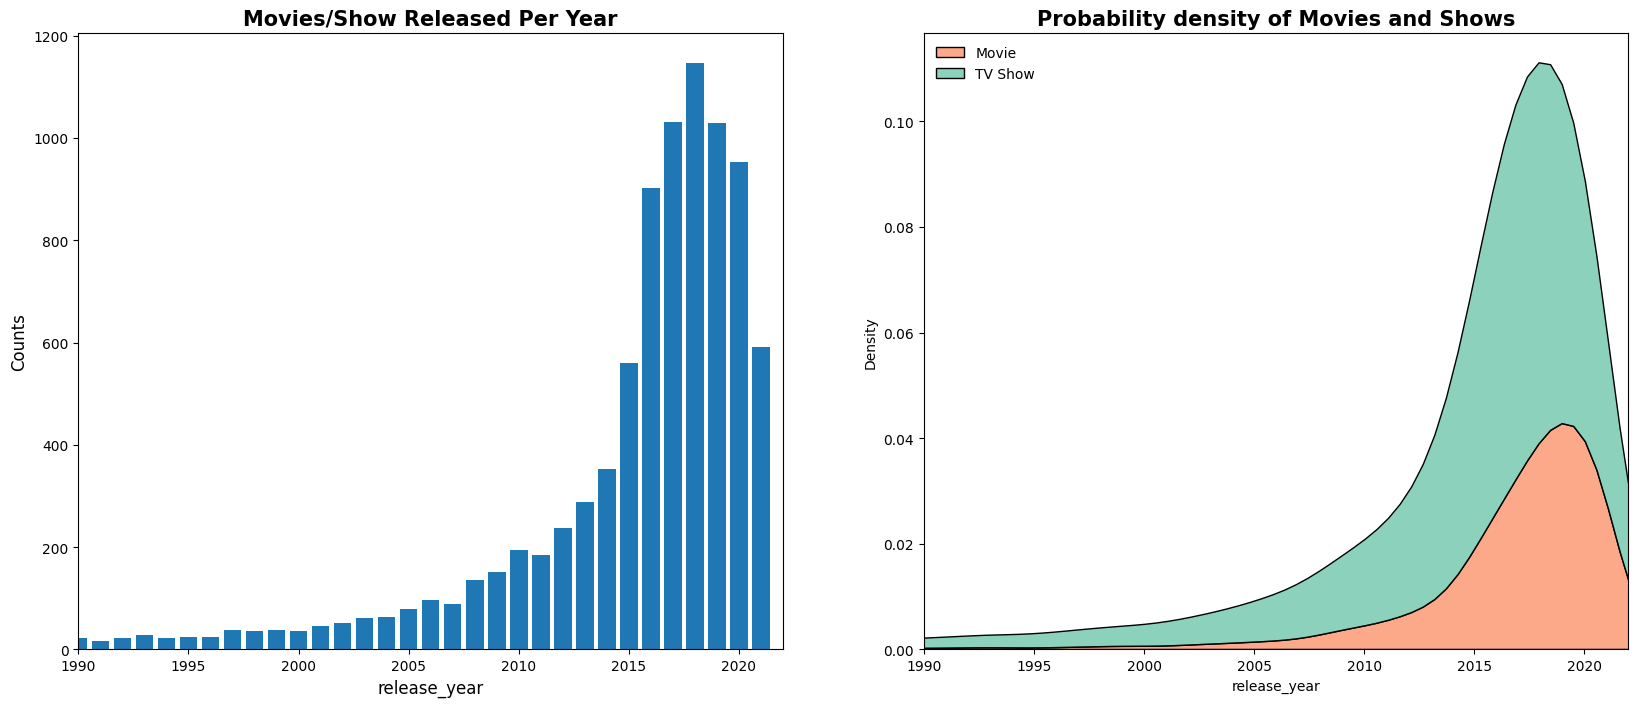

In [95]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

plt.bar(year,val)
plt.xlim(1990,2022)
plt.xlabel('release_year',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.title('Movies/Show Released Per Year',fontsize=15,weight='bold')


plt.subplot(1,2,2)
sns.kdeplot(x='release_year',hue='type',data=df_copy,palette='Set2',multiple='stack')
plt.xlim(1990,2022)
plt.title('Probability density of Movies and Shows',fontsize=15,weight='bold')
plt.legend(['Movie','TV Show'],loc='upper left',frameon=False)


plt.show()

- [x] **Insights**
> ### **Movies constitutes major part of release .i.e nearly 70 percentage, whereas TV Shows only 30**
> **Although, percentage increase of TV Show's is much higher than Movies in past 30 years**

___

___

## Best time to launch a TV show

In [96]:
df_show = df_copy.query("type == 'TV Show'")
df_show.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0


In [97]:
df_show['Month'] = df_show['date_added'].dt.month_name()
df_show['Day'] = df_show['date_added'].dt.day_name()

<ipython-input-97-ae4be26065a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['Month'] = df_show['date_added'].dt.month_name()
<ipython-input-97-ae4be26065a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['Day'] = df_show['date_added'].dt.day_name()


In [98]:
df_show.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add,Month,Day
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,Friday


In [99]:
df_m = df_show.groupby('Month')[['type']].count().reset_index()
df_m = df_m.rename(columns={'type':'counts'})

In [100]:
df_m['Month']=df_m['Month'].astype('category')

In [101]:
df_m['Month'] = df_m['Month'].cat.set_categories(['January','February','March','April','May','June','July','August','September','October','November','December'],ordered=True)

In [102]:
df_m.sort_values('counts',ascending=False)
df_m

,Month,counts
0,April,214
1,August,236
2,December,266
3,February,181
4,January,192
5,July,262
6,June,236
7,March,213
8,May,193
9,November,207


In [103]:
df_d = df_show.groupby('Day')[['type']].count().reset_index()
df_d = df_d.rename(columns={'type':'counts'})

In [104]:
df_d['Day'] = df_d['Day'].astype('category')

In [105]:
df_d['Day'] = df_d['Day'].cat.set_categories(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered=True)

In [106]:
df_d.sort_values('counts',ascending=False)


,Day,counts
0,Friday,932
6,Wednesday,382
5,Tuesday,345
4,Thursday,343
2,Saturday,259
1,Monday,223
3,Sunday,182


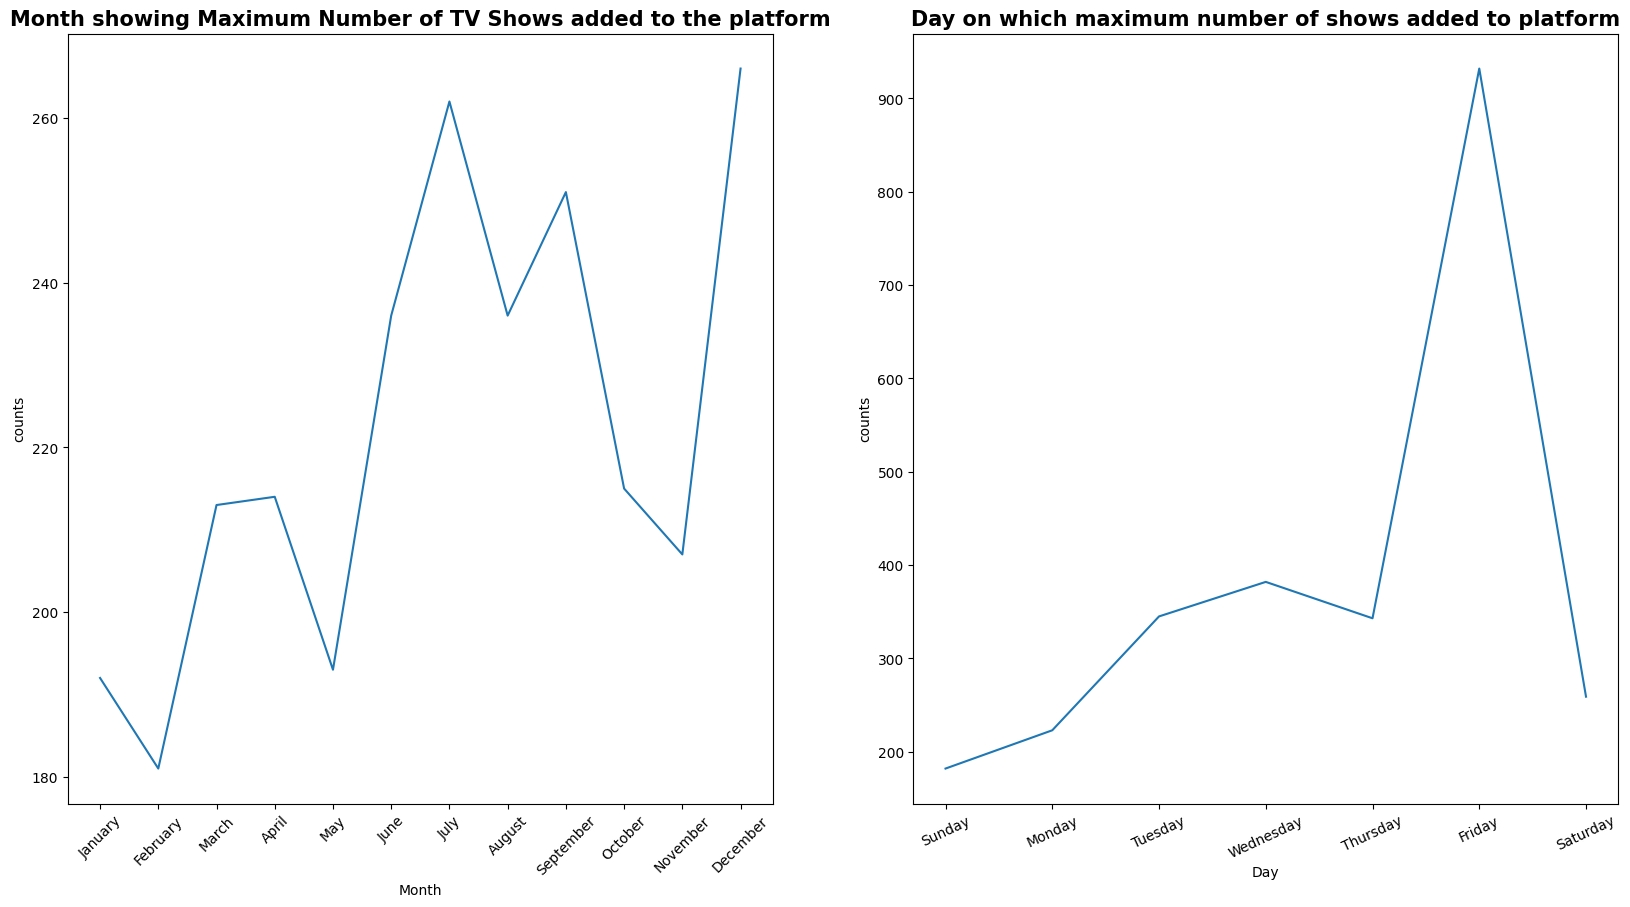

In [107]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.lineplot(x='Month',y='counts',data=df_m)
plt.xticks(rotation=45)
plt.title('Month showing Maximum Number of TV Shows added to the platform',fontsize=15,weight='bold')

plt.subplot(1,2,2)
sns.lineplot(x='Day',y='counts',data=df_d)
plt.title('Day on which maximum number of shows added to platform',fontsize=15,weight='bold')
plt.xticks(rotation=25)
plt.show()

- [x] **Insights**
> Important month --> December
>> This could be due to new year, or Christmas celebration as due to holiday users get enough time on these occassions. So this this month is very crucial to launch any show

> Important day   --> Friday
>> This is important, as on weekend generally users have enough time to spent on watching their favorite show.

----

___

## Analysis of actors/directors and types of shows/movies

In [108]:
direc = df.copy()

In [109]:
direc['director'] = direc['director'].str.split(',')

In [110]:
drc = direc.explode('director')

##### Top 10 Directors who made highest Movies or TV Show

In [111]:
drc.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [112]:
Name = drc['director'].value_counts().index
Total = drc['director'].value_counts().values

In [113]:
Top10 = Name[:10]
Top10

Index(['Rajiv Chilaka', 'Raúl Campos', ' Jan Suter', 'Marcus Raboy',
       'Suhas Kadav', 'Jay Karas', 'Cathy Garcia-Molina', 'Martin Scorsese',
       'Jay Chapman', 'Youssef Chahine'],
      dtype='object')

In [114]:
Total = Total[:10]

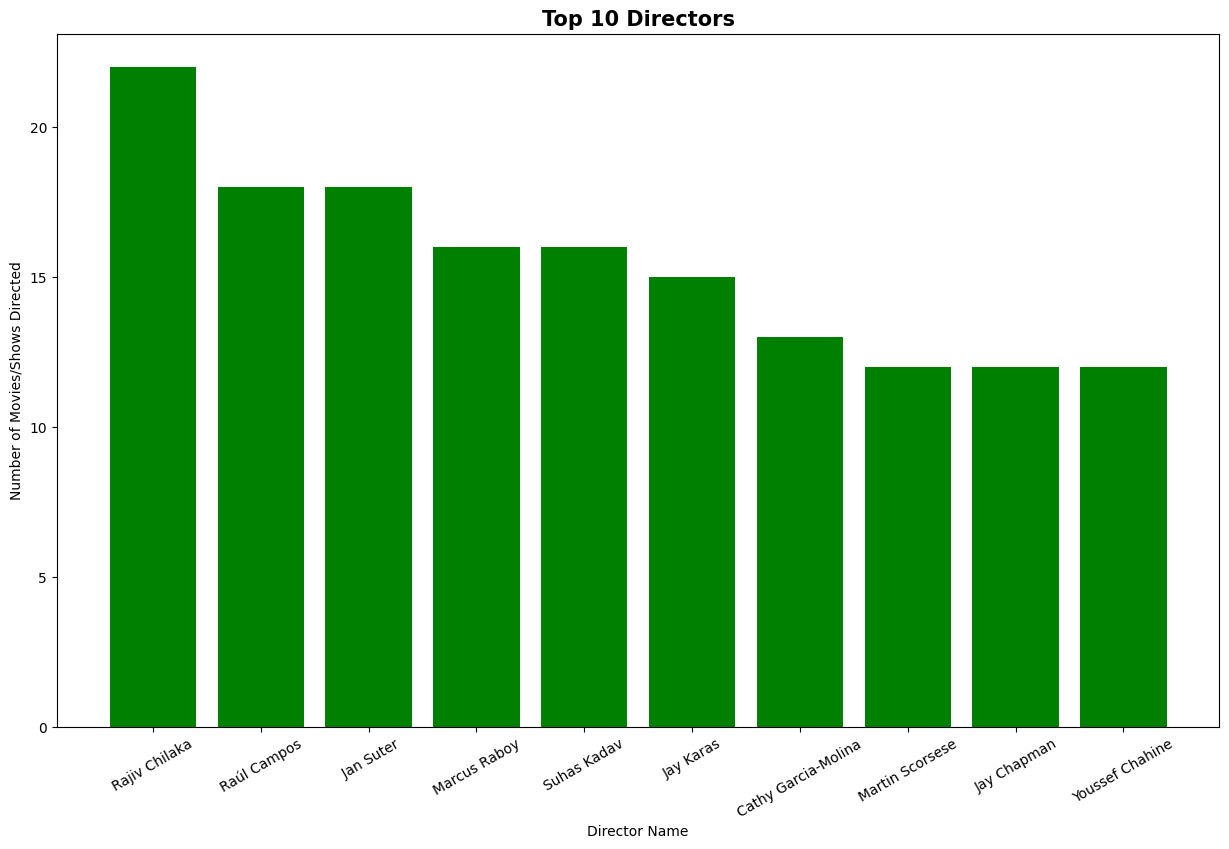

In [115]:
fig = plt.figure(figsize=(15,9))

plt.bar(Top10,Total,color='g')
plt.title('Top 10 Directors',fontsize=15,weight='bold')
plt.xticks(rotation = 30)
plt.xlabel('Director Name',fontsize=10)
plt.ylabel('Number of Movies/Shows Directed',fontsize=10)


plt.show()

In [116]:
# Movies Directed
dm = drc.query("type=='Movie'")['director'].value_counts()
Top_10_movie_d = dm.index[:10]
val_m = dm.values[:10]

In [117]:
# Shows directed
ds = drc.query("type=='TV Show'")['director'].value_counts()
Top = ds.index[:10]
val_s = ds.values[:10]

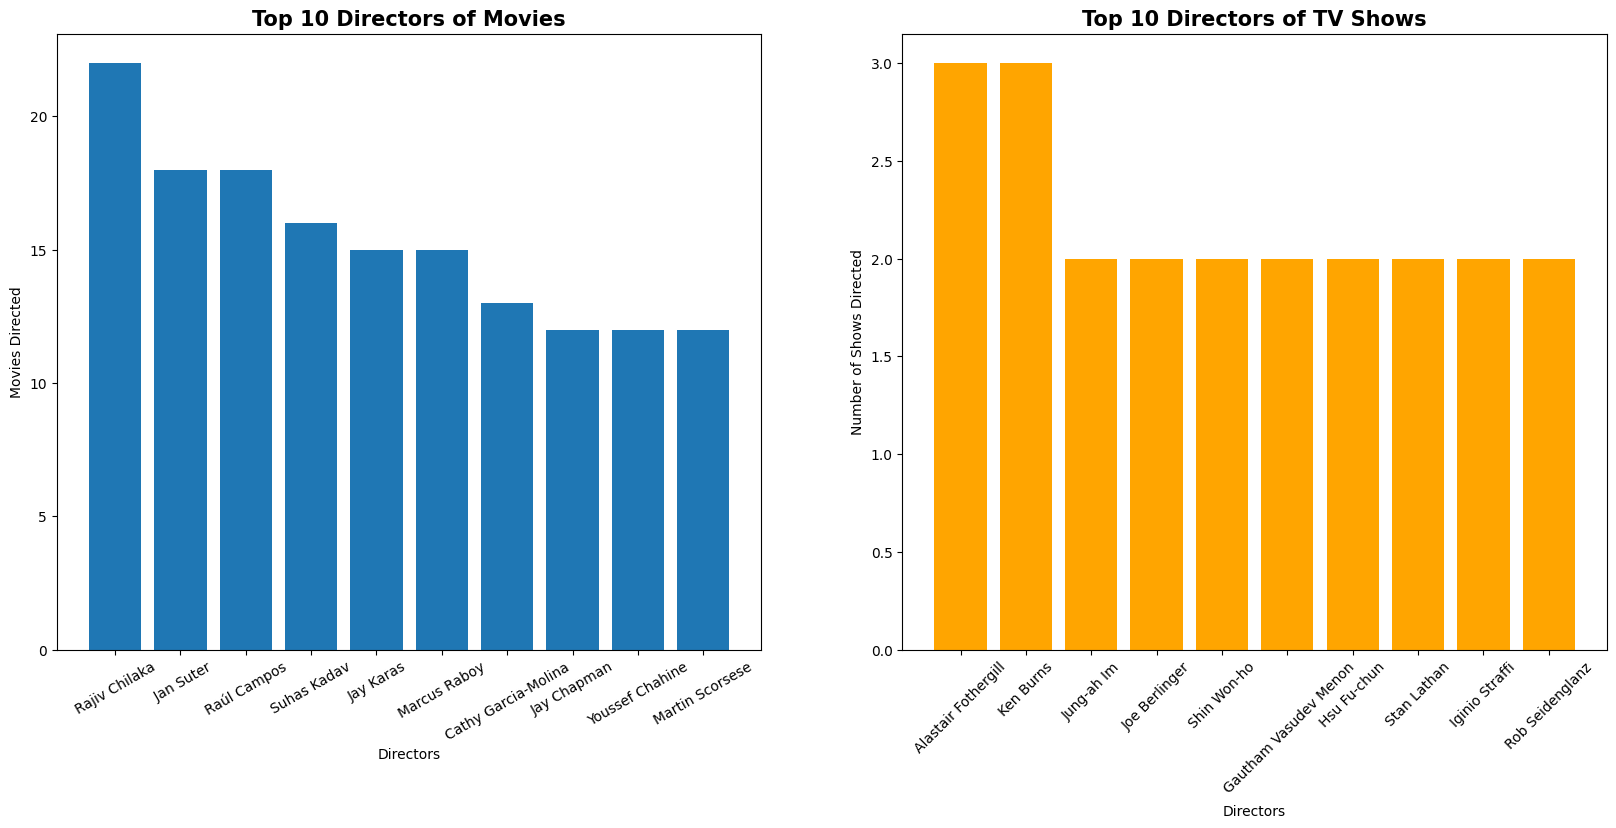

In [118]:
fig = plt.figure(figsize=(20,8))
# Movies
plt.subplot(1,2,1)
plt.bar(Top_10_movie_d,val_m)
plt.title('Top 10 Directors of Movies',fontsize=15,weight='bold')
plt.xticks(rotation=30)
plt.xlabel('Directors',fontsize=10)
plt.ylabel('Movies Directed',fontsize=10)

# Shows
plt.subplot(1,2,2)
plt.bar(Top,val_s,color='orange')
plt.title('Top 10 Directors of TV Shows',fontsize=15,weight='bold')
plt.xlabel('Directors',fontsize=10)
plt.ylabel('Number of Shows Directed',fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [119]:
drc['Directors'] = drc.groupby('show_id')[['director']].transform(lambda x:x.count())

In [120]:
drc.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add,Directors
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,0


Text(0, 0.5, 'Movie Counts')

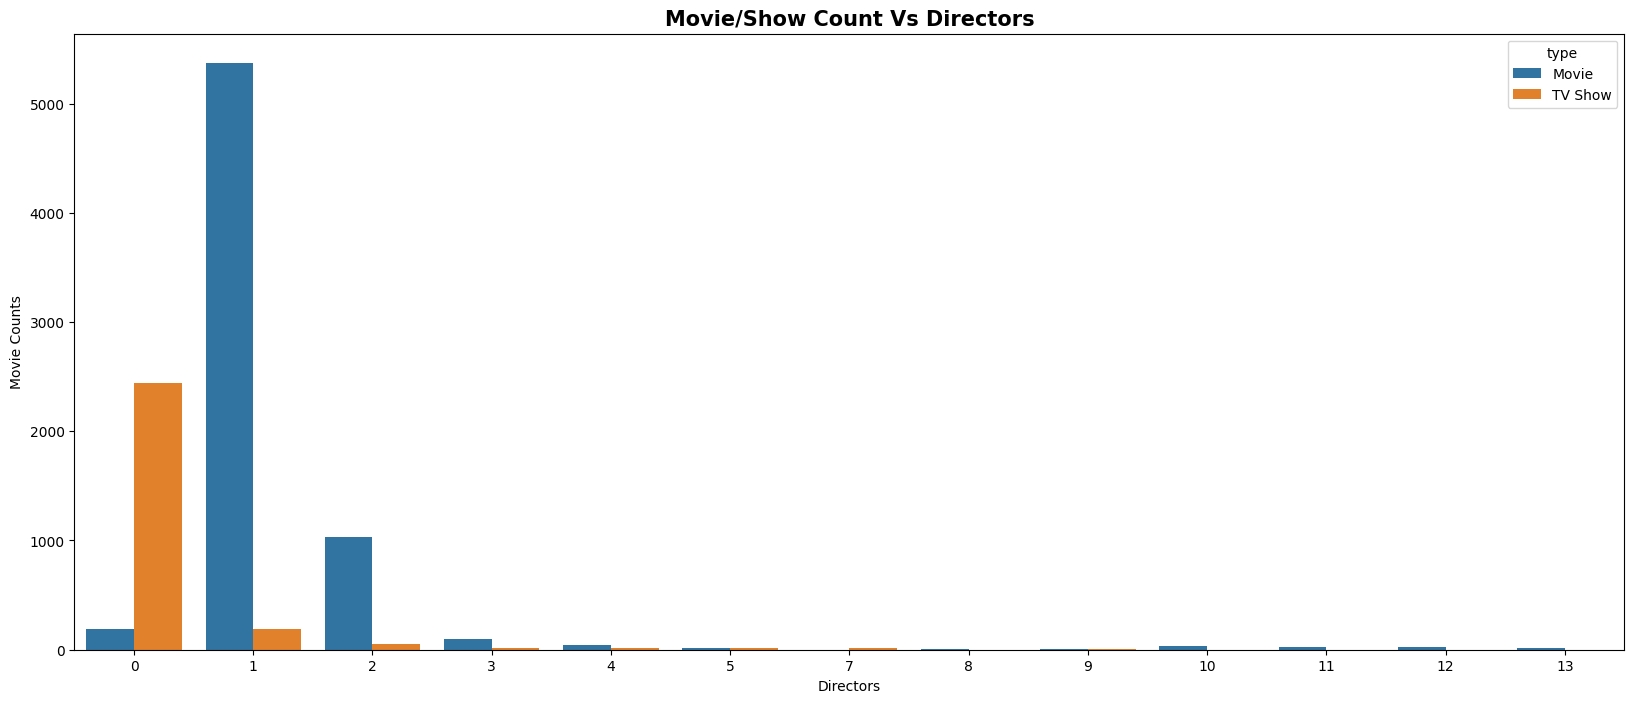

In [121]:
fg = plt.figure(figsize=(20,8))
sns.countplot(data=drc,x='Directors',hue='type',dodge=True)
plt.title('Movie/Show Count Vs Directors',fontsize=15,weight='bold')
plt.ylabel('Movie Counts',fontsize=10)

In [122]:
Mature_movies = ['TV-MA','R','NC-17','G']
Adolescent = ['TV-14','TV-PG','PG-13','PG','TV-G','G']
Kids = ['TV-Y','TV-Y7-FV','G']
drc['rating_new'] = drc['rating'].apply(lambda x: 'Mature' if x in (Mature_movies) else 'Adolescent' if x in (Adolescent) else 'Kids')

In [123]:
d_m = drc.query("rating_new == 'Mature'")
dm = d_m['director'].value_counts()
mval = dm.values[:10]
mname = dm.index[:10]

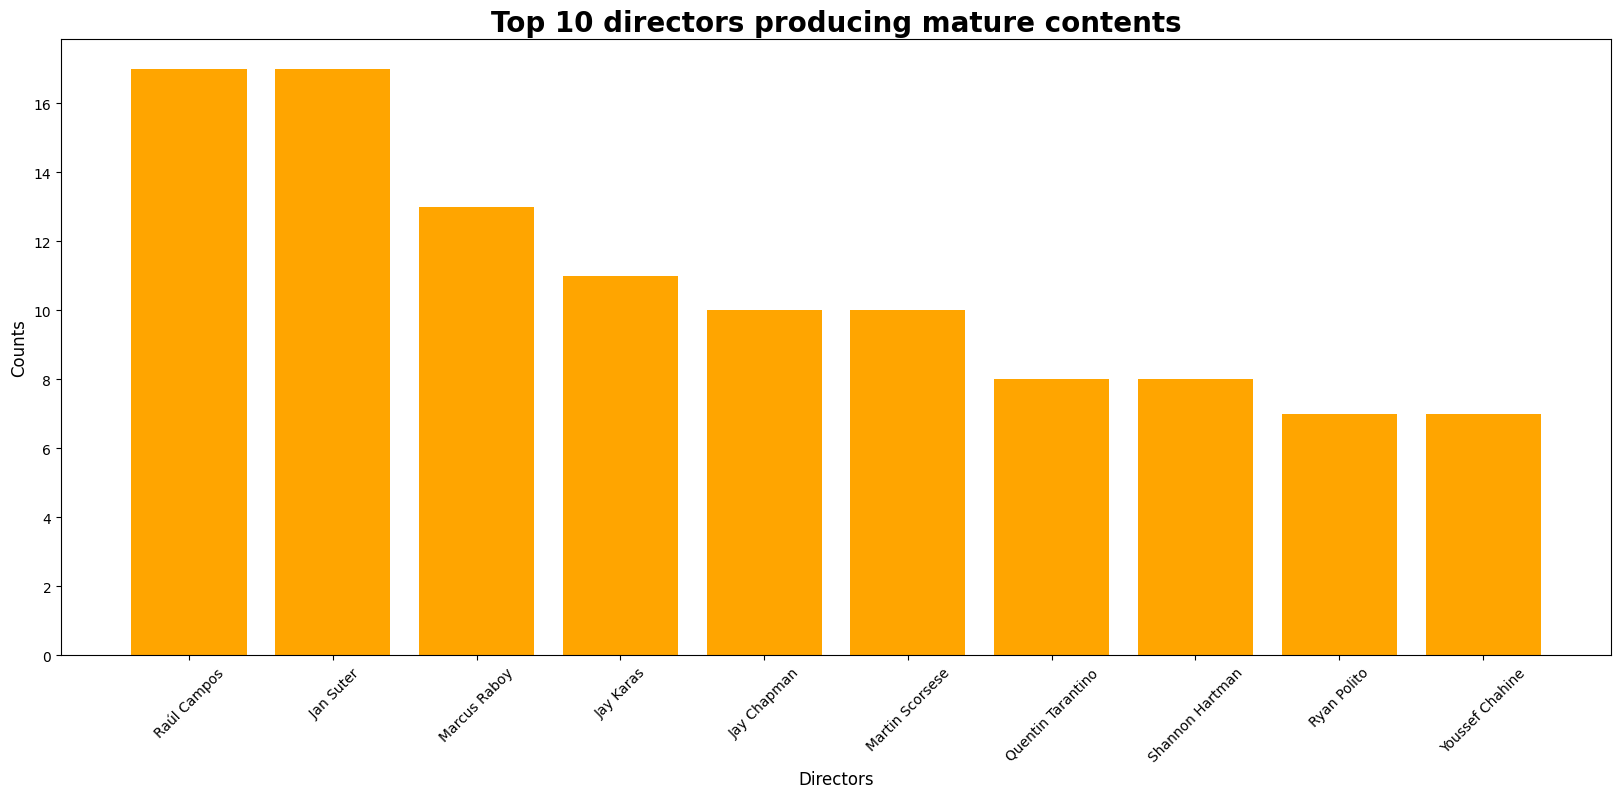

In [124]:
fg = plt.figure(figsize=(20,8))
plt.bar(mname,mval,color='orange')
plt.xticks(rotation = 45)
plt.title('Top 10 directors producing mature contents',fontsize=20,weight='bold')
plt.xlabel('Directors',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show()

In [125]:
d_a = drc.query("rating_new == 'Adolescent'")
da = d_a['director'].value_counts()
aval = da.values[:10]
aname = da.index[:10]

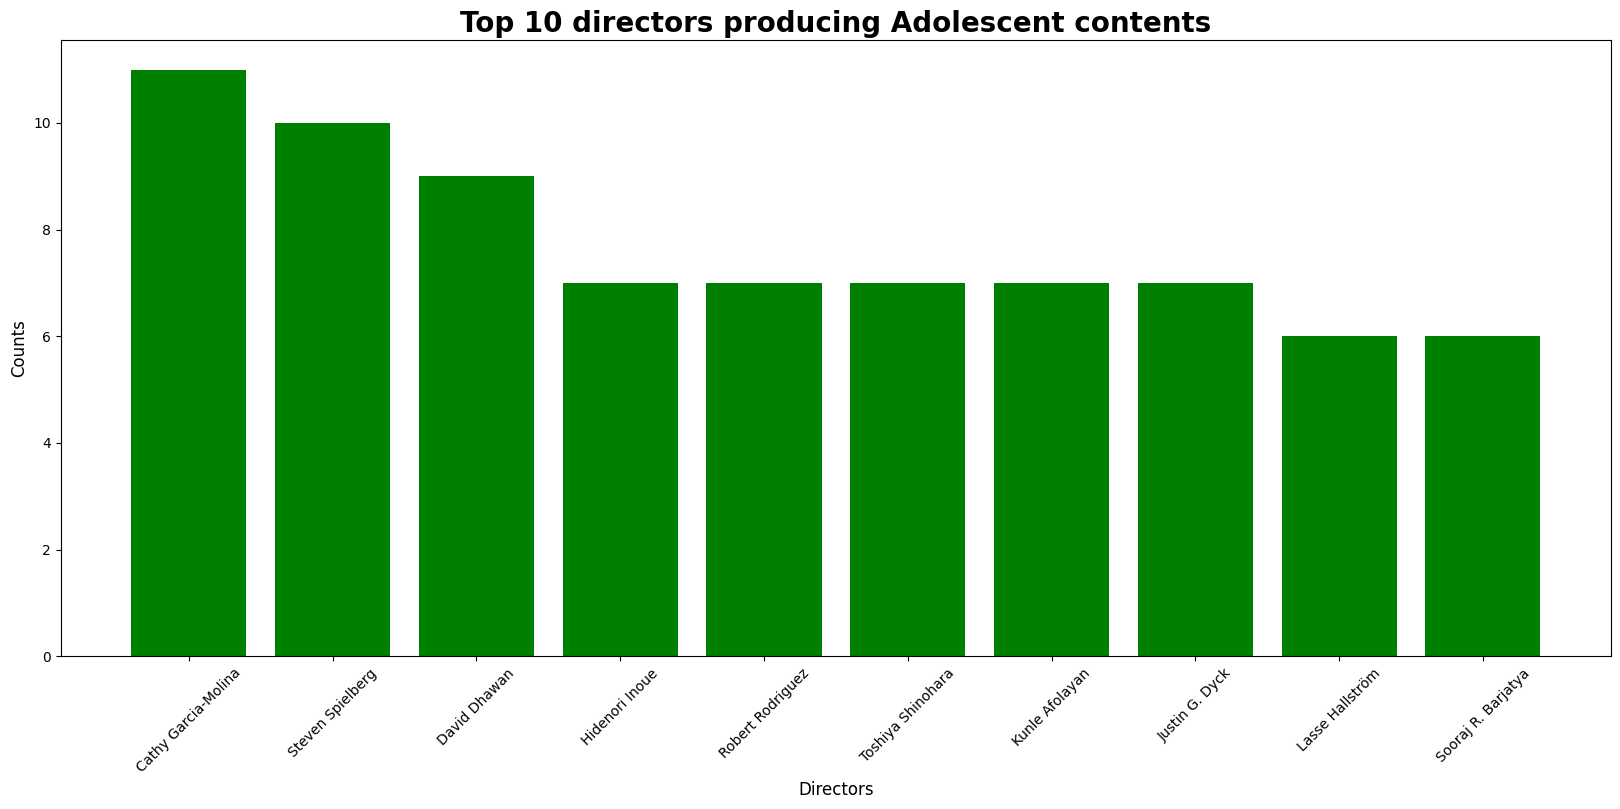

In [126]:
fg = plt.figure(figsize=(20,8))
plt.bar(aname,aval,color='g')
plt.xticks(rotation = 45)
plt.title('Top 10 directors producing Adolescent contents',fontsize=20,weight='bold')
plt.xlabel('Directors',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show()

In [127]:
d_k = drc.query("rating_new == 'Kids'")
dk = d_k['director'].value_counts()
kval = dk.values[:10]
kname = dk.index[:10]

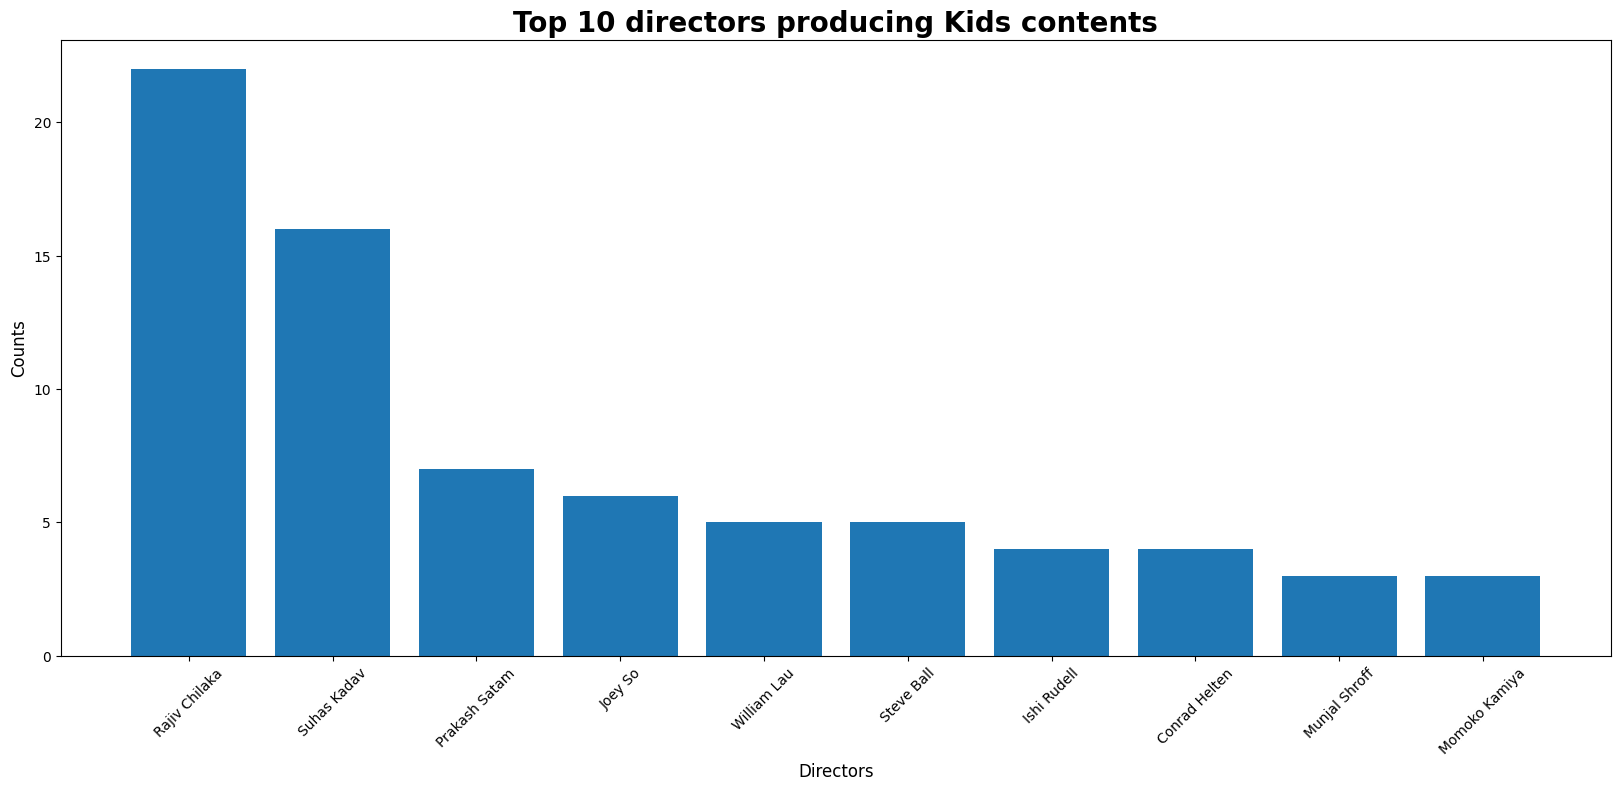

In [128]:
fg = plt.figure(figsize=(20,8))
plt.bar(kname,kval)
plt.xticks(rotation = 45)
plt.title('Top 10 directors producing Kids contents',fontsize=20,weight='bold')
plt.xlabel('Directors',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show()

In [129]:
drc.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add,Directors,rating_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1,Adolescent
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0,Mature
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1,Mature


____

In [130]:

dr = drc.copy()

In [131]:
dr['listed_in'] = dr['listed_in'].str.split(',')

In [132]:
dr = dr.explode('listed_in')

In [133]:
dr['listed_in'] = dr['listed_in'].apply(lambda x:x.lstrip())

In [134]:
# Replacing the repeated names and merging the category
dr['listed_in'] = dr['listed_in'].apply(lambda x:'Movies' if 'Movies' in x else 'Dramas' if  'Dramas' in x else 'TV Shows' if 'TV Shows' in x else 'Comedies' if 'Comed' in x else 'Action & Adventure' if 'Adventure' in x else 'Thrillers' if 'Thriller' in x else 'Sci-Fi & Fantasy' if 'Fantasy' in x else 'Anime' if 'Anime' in x else x)

In [135]:
dr.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add,Directors,rating_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1,Adolescent
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,0,Mature
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,0,Mature
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,0,Mature
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,TV Shows,To protect his family from a powerful drug lor...,2021.0,1,Mature


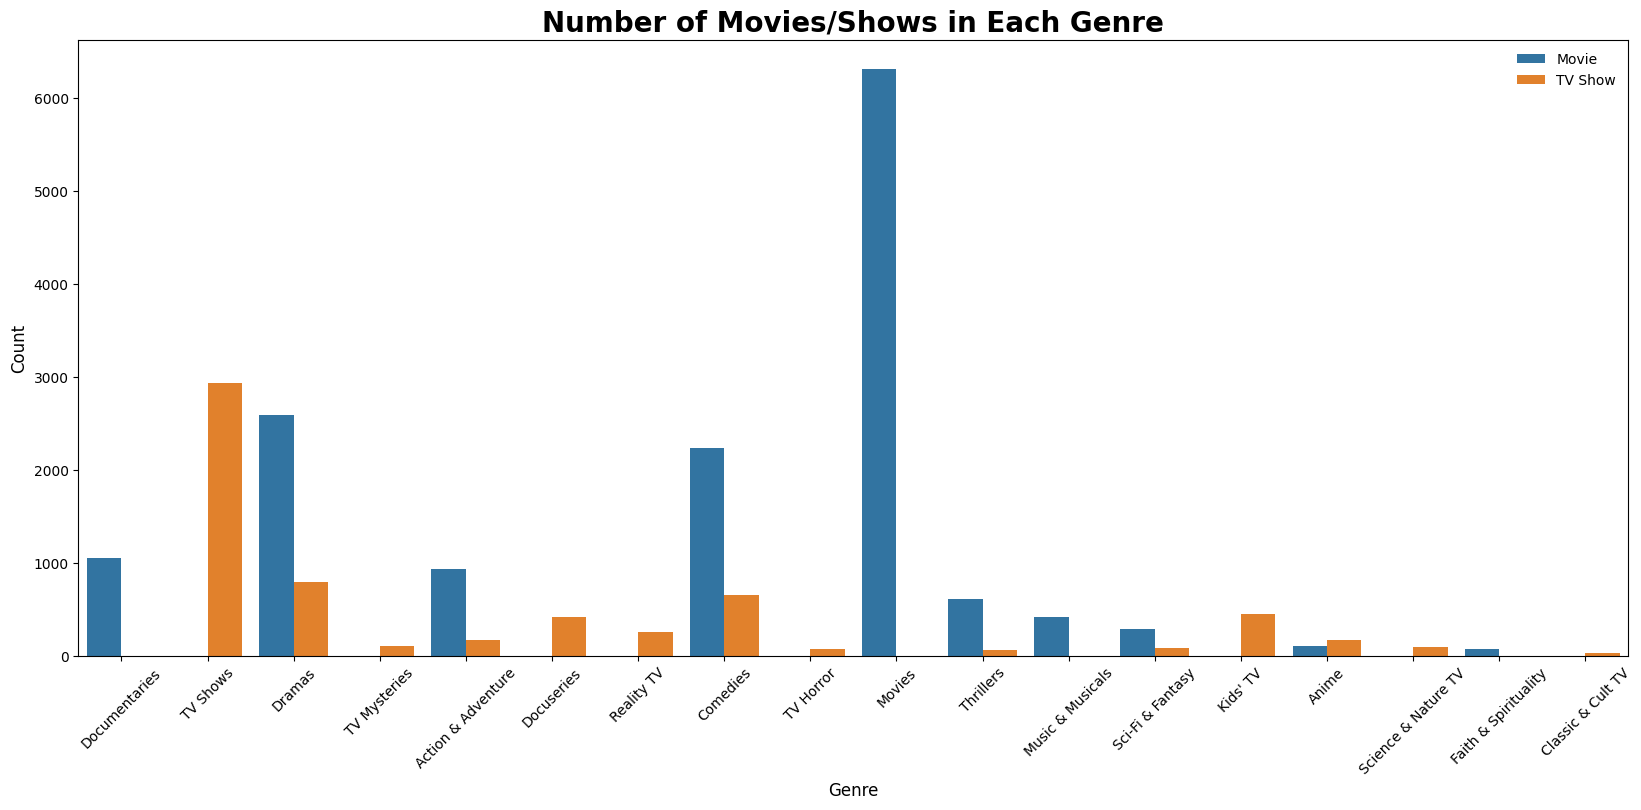

In [136]:
fig = plt.figure(figsize=(20,8))

sns.countplot(data=dr,x='listed_in',hue='type')
plt.legend(['Movie','TV Show'],loc='upper right',frameon=False)
plt.title('Number of Movies/Shows in Each Genre',fontsize=20,weight='bold')
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.show()

- [x] Insight
> **Most famous directors ---> 'Rajiv Chilaka', 'Raúl Campos', ' Jan Suter', 'Marcus Raboy','Suhas Kadav'**



___

### Analysis on rating

>**Mature movies --> ['TV-MA','R','NC-17','G']**

>**Adolescent --> ['TV-14','TV-PG','PG-13','PG','TV-G','G']**

>**Kids --> ['TV-Y','TV-Y7-FV','G']**

>**G --> all ages**

>**NR --> Not Rated**

In [138]:
dta = drc.copy()

**Creating new column by replacing Movies == 1 and TV Show == 0**

In [139]:
dta['cat'] = dta['type'].apply(lambda x: 1 if x=='Movie' else 0)

In [140]:
d = dta.query("rating in ['66 min','74 min', '84 min']")
dta.drop(index=d.index,inplace=True)

In [141]:
dta.drop(['show_id','title','description'],axis=1,inplace=True)

In [142]:
# Age category and type
Mature_movies = ['TV-MA','R','NC-17','G']
Adolescent = ['TV-14','TV-PG','PG-13','PG','TV-G','G']
Kids = ['TV-Y','TV-Y7-FV','G']

dta['rating_new'] = dta['rating'].apply(lambda x: 'Mature' if x in (Mature_movies) else 'Adolescent' if x in (Adolescent) else 'Kids')

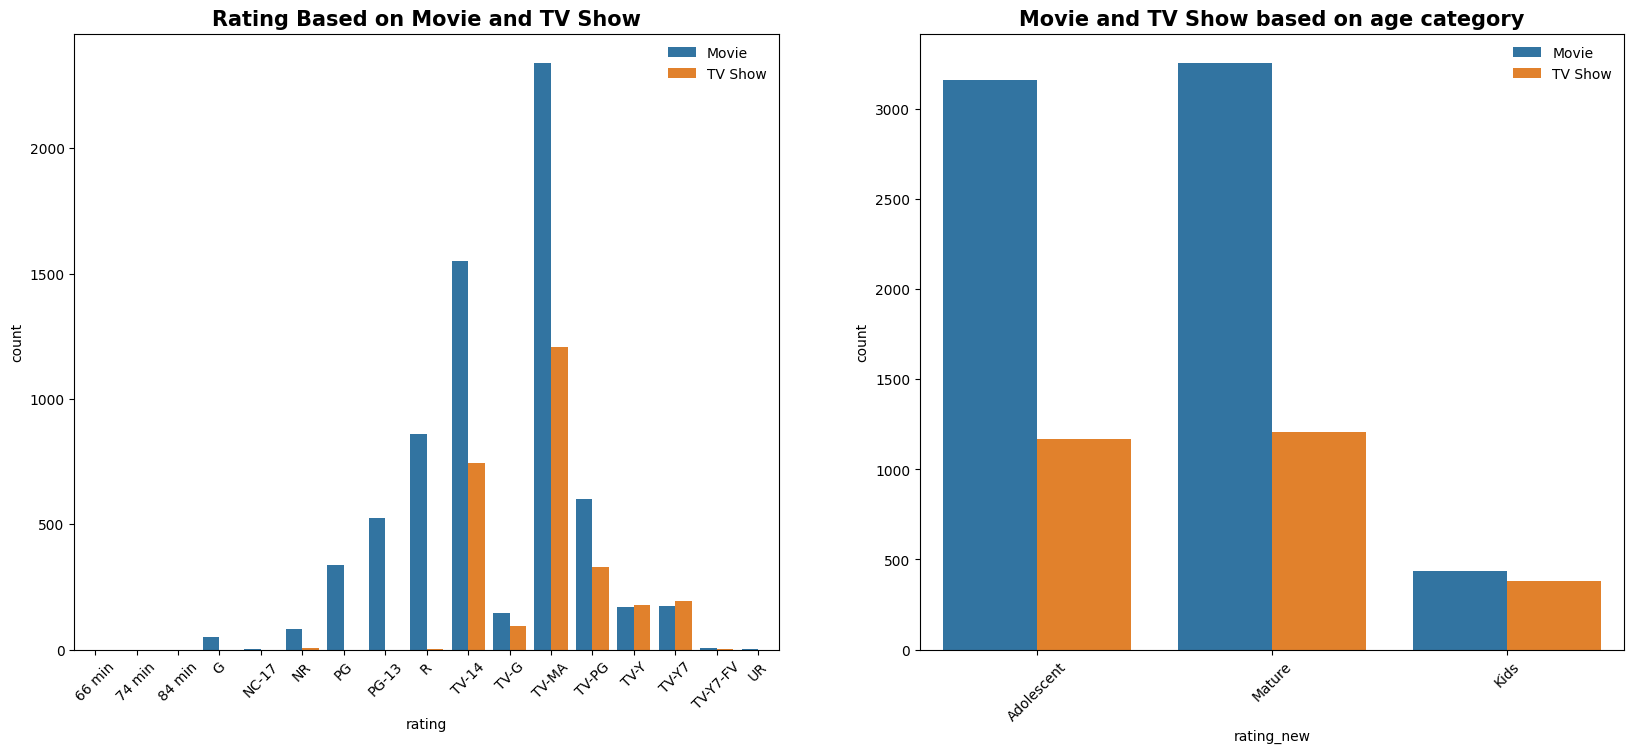

In [143]:
fig = plt.figure(figsize=(20,8))
# Rating and type
plt.subplot(1,2,1)
sns.countplot(dta,x='rating',hue='type')
plt.legend(['Movie','TV Show'],loc='upper right',frameon=False)
plt.title('Rating Based on Movie and TV Show',fontsize=15,weight='bold')
plt.xticks(rotation=45)

# Age category and type
plt.subplot(1,2,2)
sns.countplot(dta,x='rating_new',hue='type')
plt.legend(['Movie','TV Show'],loc='upper right',frameon=False)
plt.title('Movie and TV Show based on age category',fontsize=15,weight='bold')
plt.xticks(rotation=45)
plt.show()
plt.show()

- [x] Insights
> *Most of the items available on netflix is either of Mature or for Adolescent*

### Analysis on **Actors**

In [144]:
cst = df.copy()

In [145]:
cst.drop(index=cst.query("cast.isna()").index,inplace=True)

In [146]:
# Splitting element
cst['cast'] = cst['cast'].str.split(',')

# Exploding cast column
cast = cst.explode('cast')

In [147]:
cast['cast'] = cast['cast'].str.lstrip()

In [148]:
cast['cast'].str.lstrip().value_counts().head(10).index

Index(['Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani', 'Naseeruddin Shah',
       'Takahiro Sakurai', 'Rupa Bhimani', 'Akshay Kumar', 'Om Puri',
       'Yuki Kaji', 'Paresh Rawal'],
      dtype='object')

In [149]:
Top = pd.DataFrame(cast[['cast','type']].value_counts()).reset_index()
Top.columns=['Name','type','count']
Top = Top.head(20)

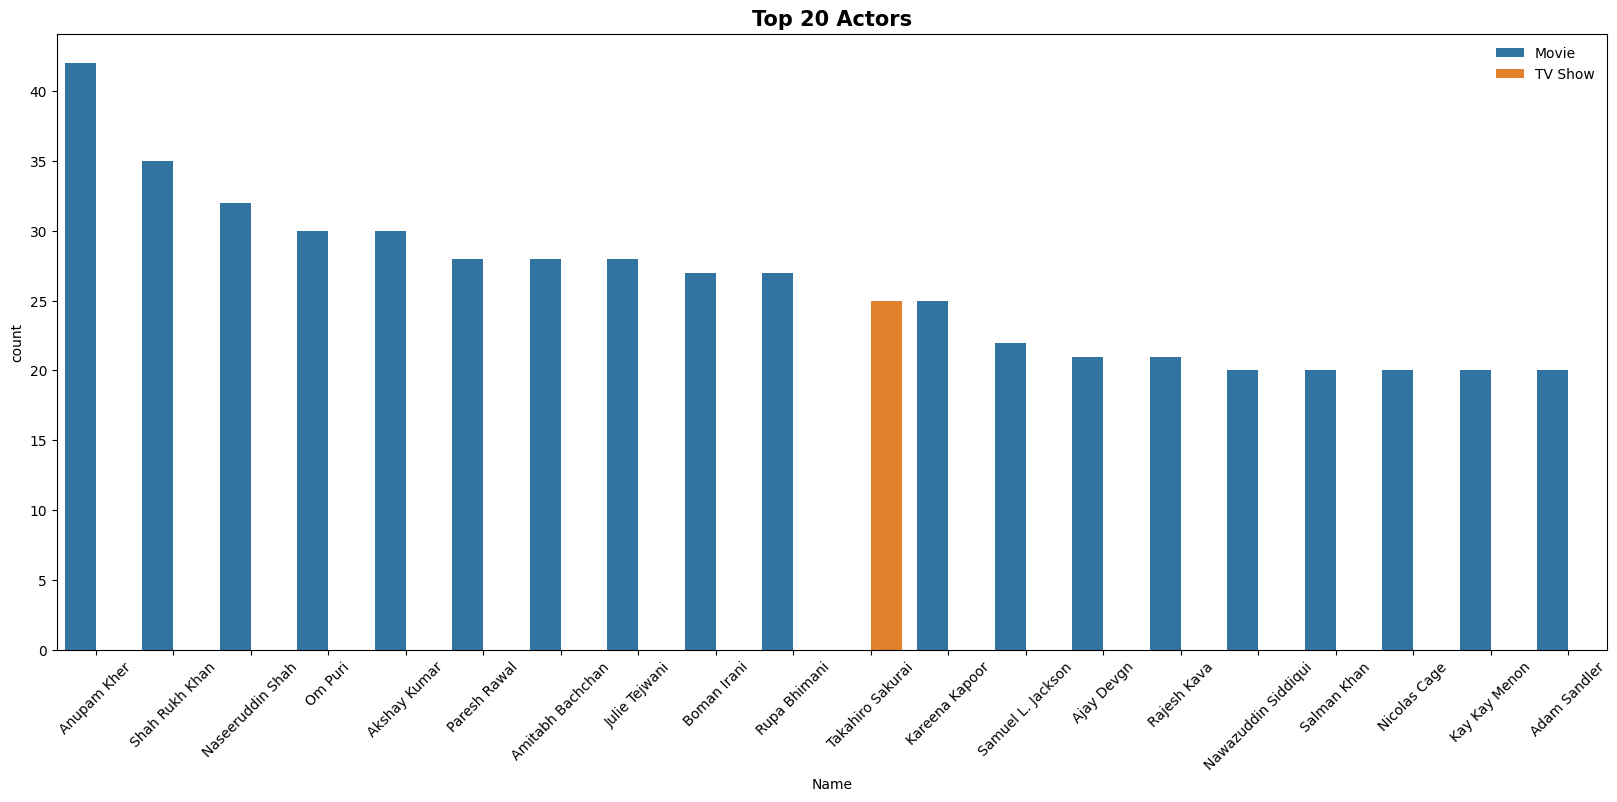

In [150]:
fig = plt.figure(figsize=(20,8))

sns.barplot(x='Name',y='count',data=Top,hue='type')
plt.title('Top 20 Actors',fontsize=15,weight='bold')
plt.legend(loc='upper right',frameon=False)
plt.xticks(rotation = 45)

plt.show()

#### Top 10 Actors category(rating) wise

In [151]:
Mature_movies = ['TV-MA','R','NC-17','G']
Adolescent = ['TV-14','TV-PG','PG-13','PG','TV-G','G']
Kids = ['TV-Y','TV-Y7-FV','G']
cast['rating_new'] = cast['rating'].apply(lambda x: 'Mature' if x in (Mature_movies) else 'Adolescent' if x in (Adolescent) else 'Kids')

In [152]:
mat = cast.query("rating_new=='Mature'")
mat[['cast','type']]

,cast,type
1,Ama Qamata,TV Show
1,Khosi Ngema,TV Show
1,Gail Mabalane,TV Show
1,Thabang Molaba,TV Show
1,Dillon Windvogel,TV Show
...,...,...
8804,Emma Stone,Movie
8804,Abigail Breslin,Movie
8804,Amber Heard,Movie
8804,Bill Murray,Movie


In [153]:
mat = pd.DataFrame(mat[['cast','type']].value_counts()).reset_index()
mat.columns=['Name','type','count']
topm = mat.head(20)

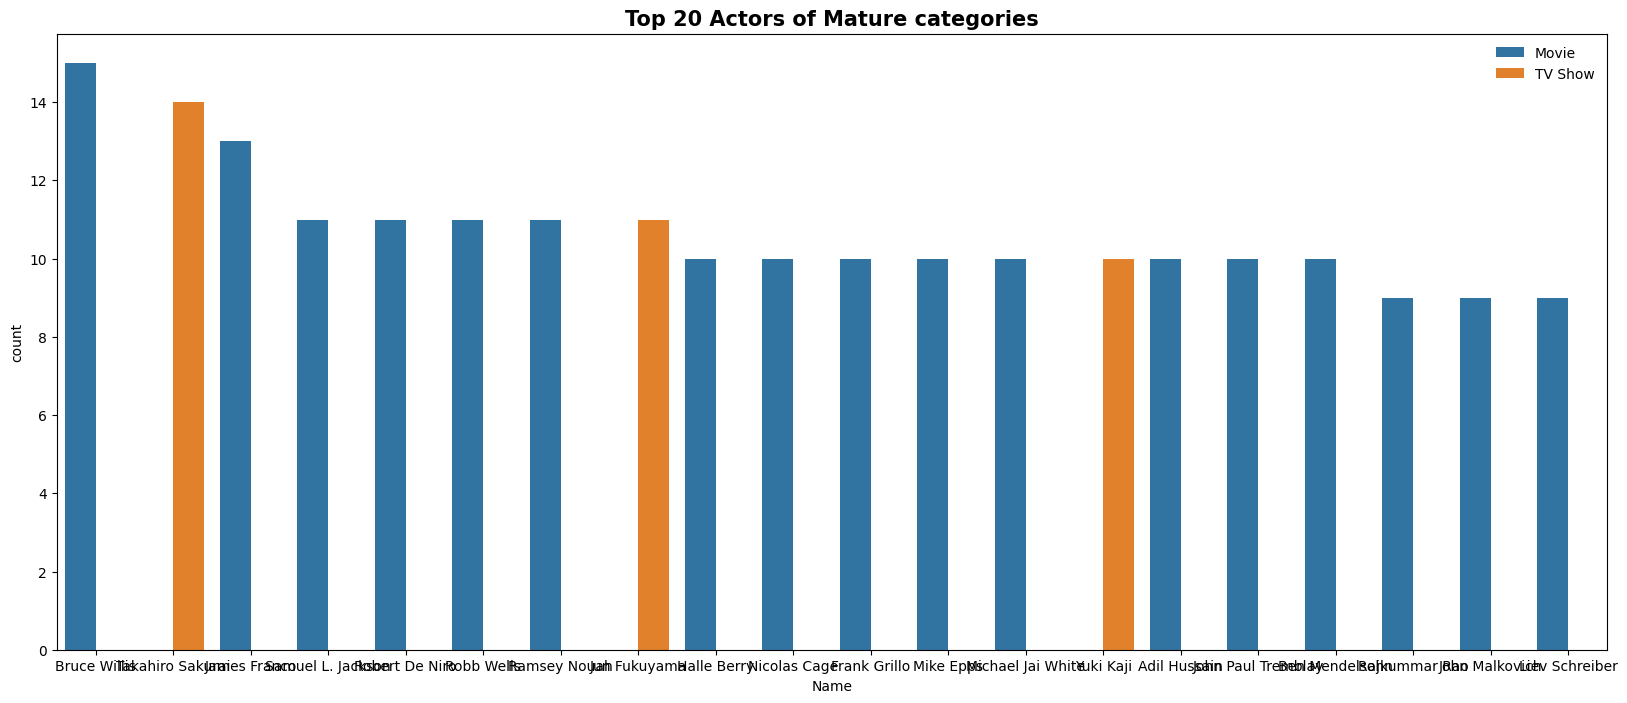

In [154]:
fig = plt.figure(figsize=(20,8))

sns.barplot(x='Name',y='count',data=topm,hue='type')
plt.title('Top 20 Actors of Mature categories',fontsize=15,weight='bold')
plt.legend(loc='upper right',frameon=False)

plt.show()

In [155]:
ado = cast.query("rating_new=='Adolescent'")

In [156]:
ad = pd.DataFrame(ado[['cast','type']].value_counts()).reset_index()
ad.columns=['Name','type','count']
tops = ad.head(20)

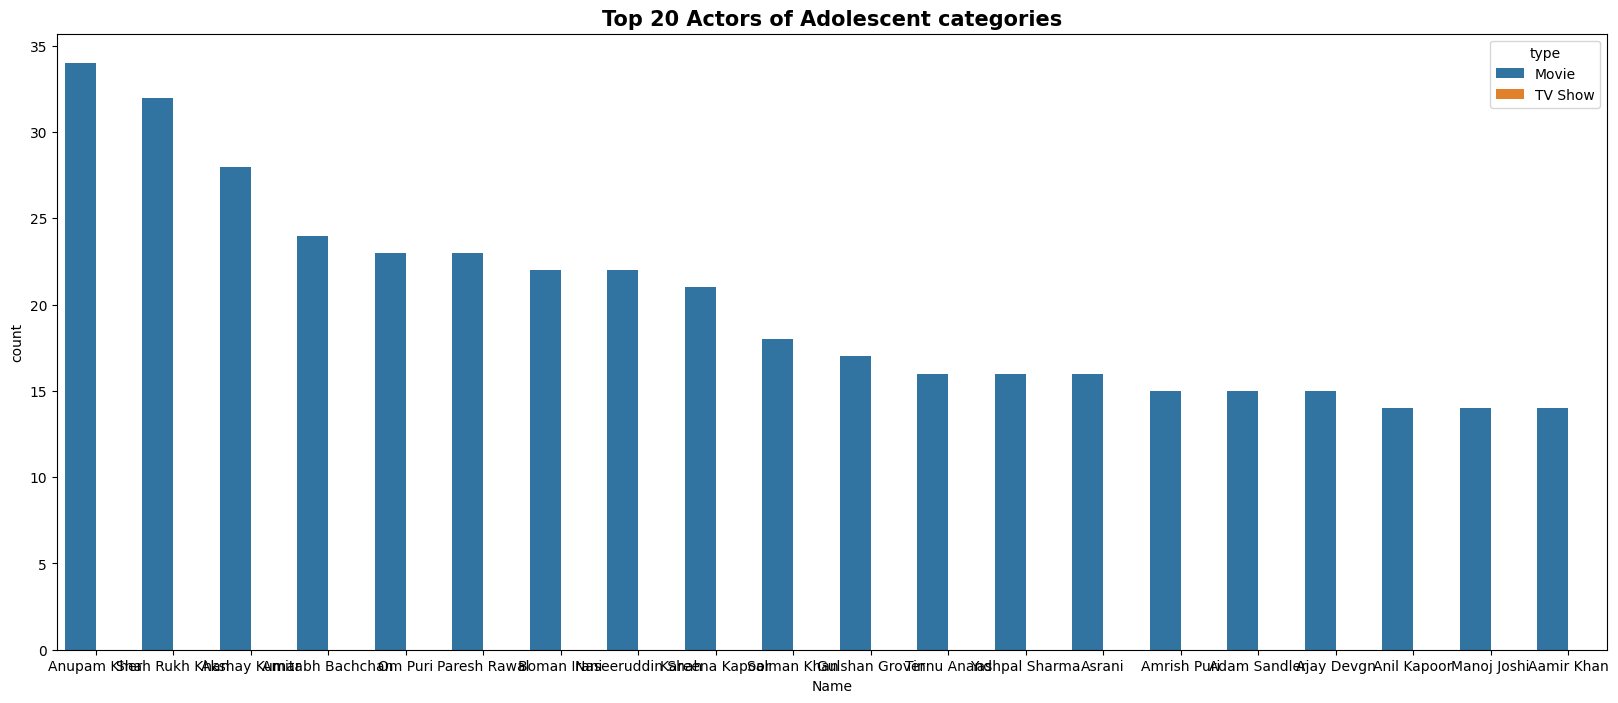

In [157]:
fig = plt.figure(figsize=(20,8))

sns.barplot(x='Name',y='count',data=tops,hue='type')
plt.title('Top 20 Actors of Adolescent categories',fontsize=15,weight='bold')

plt.show()

In [158]:
Kids = ['TV-Y','TV-Y7-FV','G']

In [159]:
kd = cast.query("rating_new=='Kids'")

In [160]:
kd = pd.DataFrame(kd[['cast','type']].value_counts()).reset_index()
kd.columns=['Name','type','count']
topk = kd.head(20)

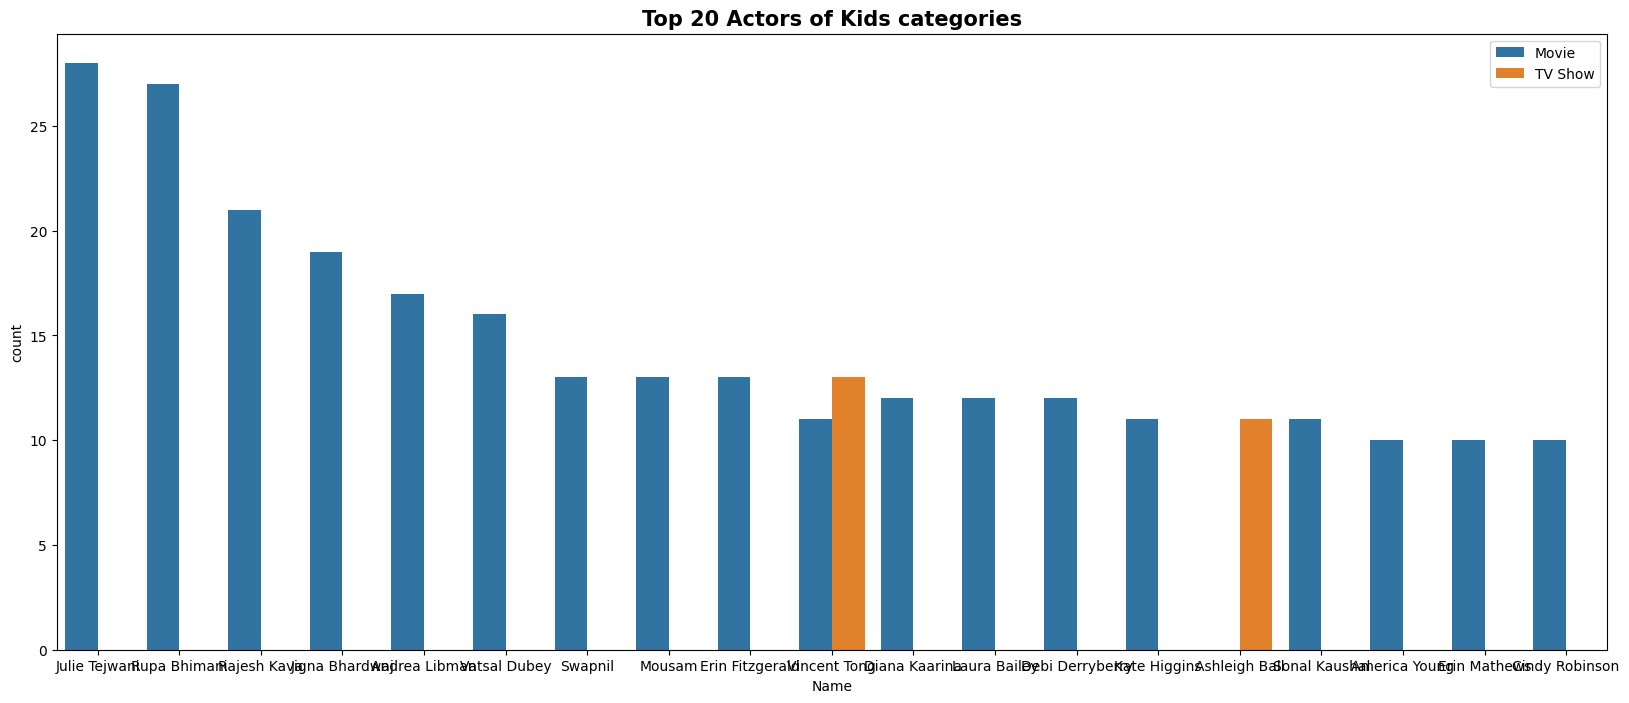

In [161]:
fig = plt.figure(figsize=(20,8))

sns.barplot(x='Name',y='count',data=topk,hue='type')
plt.title('Top 20 Actors of Kids categories',fontsize=15,weight='bold')
plt.legend(loc='upper right')

plt.show()

- [x] Insights
> Top 10 actors of all categories are  --> **['Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani', 'Naseeruddin Shah', 'Takahiro Sakurai', 'Rupa Bhimani', 'Akshay Kumar', 'Om Puri', 'Yuki Kaji', 'Paresh Rawal']**

____

## Major Focus of Netflix

____

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_add      8797 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 775.0+ KB


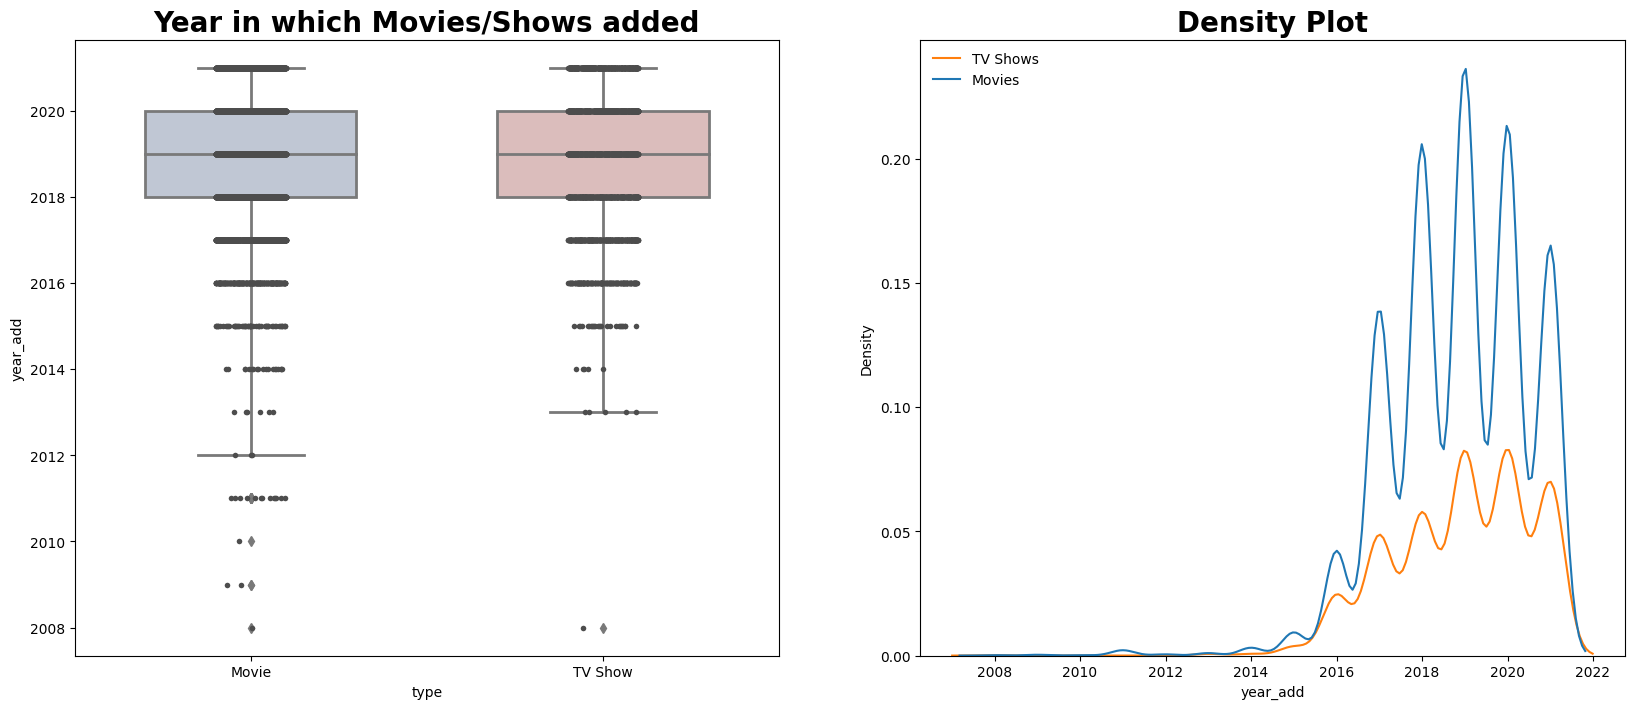

In [163]:
fg = plt.figure(figsize=(20,8))

# Plot for Year in which movies/shows added
plt.subplot(1,2,1)
sns.boxplot(data = df,x='type',y='year_add',linewidth=2,whis = 3,width=0.6,palette="vlag")
plt.title('Year in which Movies/Shows added',fontsize=20,weight='bold')
sns.stripplot(x="type", y="year_add", data=df,size=4, color=".3", linewidth=0)

# Density plot
plt.subplot(1,2,2)
sns.kdeplot(data = df,x='year_add',hue='type')
plt.title('Density Plot',fontsize=20,weight='bold')
plt.legend(['TV Shows','Movies'],loc='upper left',frameon=False)
plt.show()

- [x] Insights
> Netflix started it's online operation in near around 2008, it took 10 years to upload 25% percent of content on it's platform, Whereas in just 1 year it added 25% of shows and movies.   From above left plot we can see that median year is 2019, when most of the shows/movies added to the platform.

> The pattern seems similar for both Movies and TV Show's addition to the platform, which means Netflix has focused on both the categories. Although, overall size of movies is much larger than TV Shows.

____

## Country Wise Analysis

___

In [164]:
dc = df.copy()

In [165]:
# Splitting elements by ','
dc['country'] = dc['country'].str.split(',')

# Separating different countries with explode function
dc = dc.explode('country')

# Dropping Nan Values
dc.dropna(subset=['country'],inplace=True)

# Removing left white space
dc['country'] = dc['country'].apply(lambda x: x.lstrip())

In [166]:
dfc = dc.copy()

In [167]:
dfc = dfc['country'].value_counts().head(10).index

In [168]:
top10_c = dfc.to_list()

In [169]:
top10_c

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico']

In [170]:
# Data of top 10 countries .i.e ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']

dfc = dc[dc['country'].isin(top10_c)]

In [171]:
dfc.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0


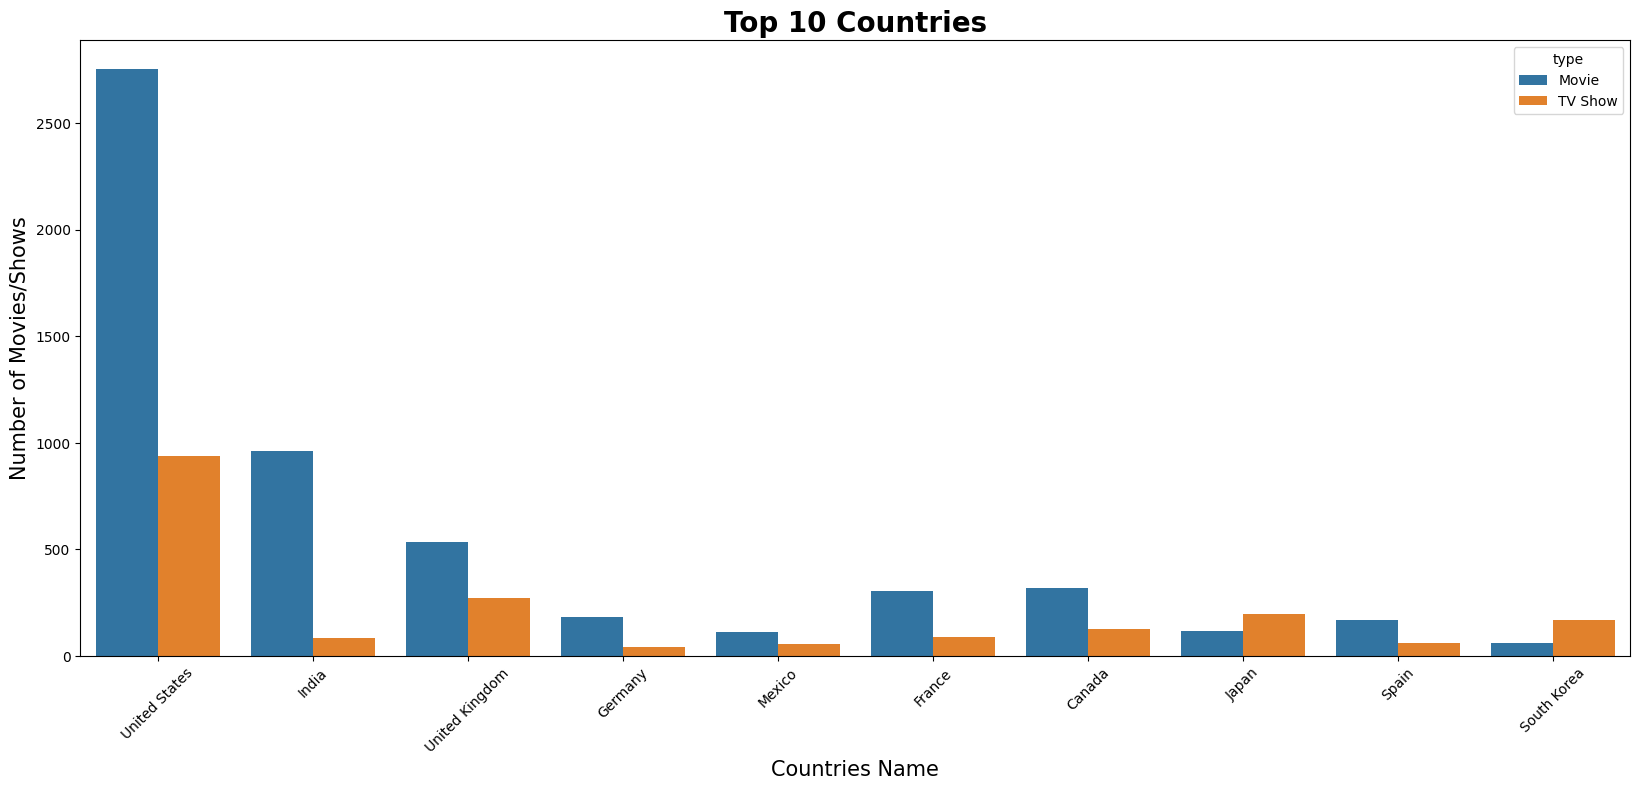

In [172]:
fg = plt.figure(figsize=(20,8))
sns.countplot(data=dfc,x='country',hue='type')
plt.xticks(rotation = 45)
plt.title('Top 10 Countries',fontsize=20,weight='bold')
plt.xlabel('Countries Name',fontsize = 15)
plt.ylabel('Number of Movies/Shows',fontsize = 15)

plt.show()

- [x] Insights
> From above its clear that top 3 coutries of choice are United States, India and United Kingdom

In [174]:
# Top 10 Directors and countries
dir = ['Rajiv Chilaka', 'Raúl Campos', 'Jan Suter', 'Marcus Raboy', 'Suhas Kadav', 'Jay Karas', 'Cathy Garcia-Molina', 'Martin Scorsese','Jay Chapman', 'Youssef Chahine']
country = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']

In [175]:
# Top 10 Directors who belongs to top 10 countries
top_dc = dc[(dc['country'].isin(country)) & (dc['director'].isin(dir))]

In [176]:
# Categorising different ratings into 3 Groups
Mature_movies = ['TV-MA','R','NC-17','G']
Adolescent = ['TV-14','TV-PG','PG-13','PG','TV-G','G']
Kids = ['TV-Y','TV-Y7-FV','G']
top_dc['rating_new'] = top_dc['rating'].apply(lambda x: 'Mature' if x in (Mature_movies) else 'Adolescent' if x in (Adolescent) else 'Kids')

<ipython-input-176-9b5cc9962819>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_dc['rating_new'] = top_dc['rating'].apply(lambda x: 'Mature' if x in (Mature_movies) else 'Adolescent' if x in (Adolescent) else 'Kids')


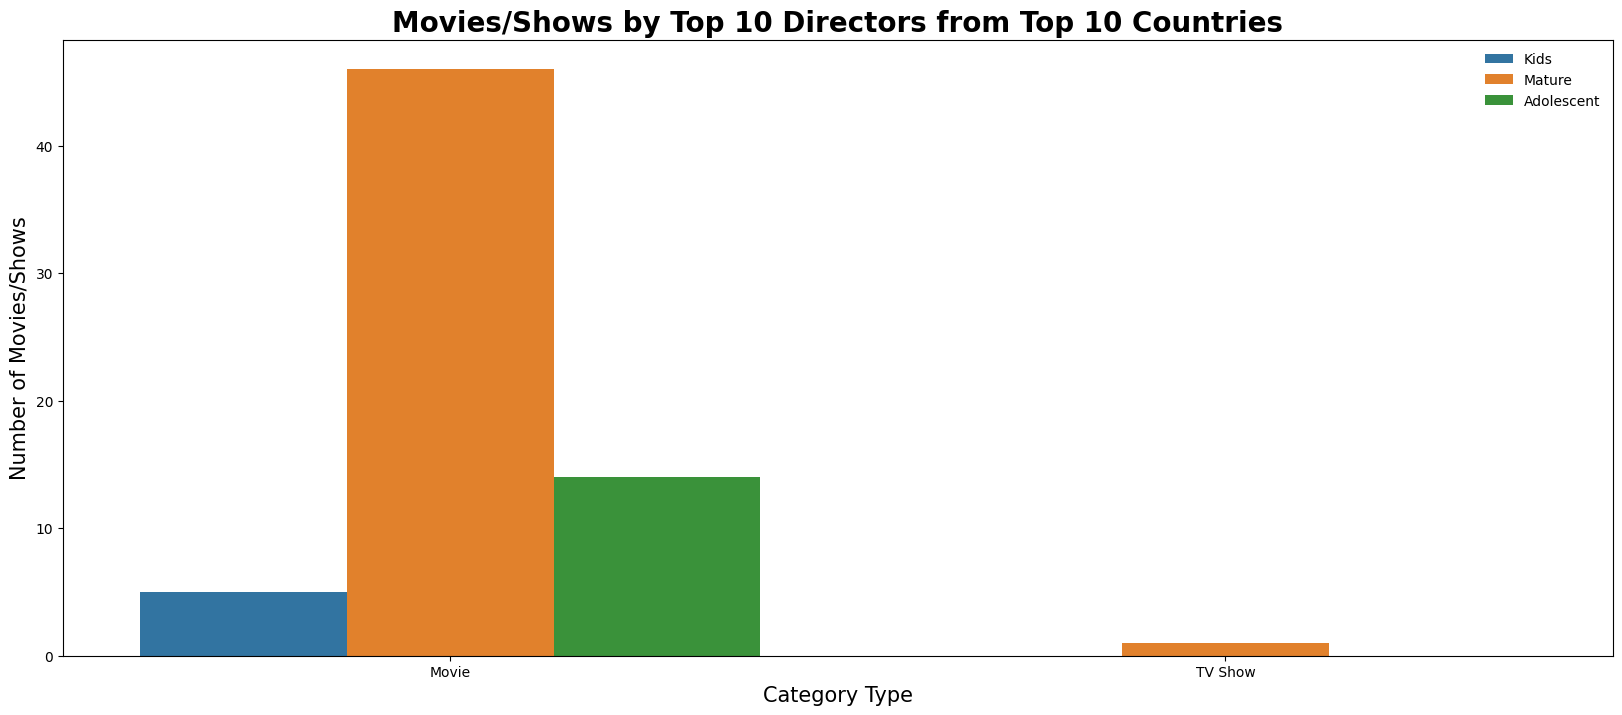

In [177]:
# Type of content produced in top 10 countries from top 10 directors
fg = plt.figure(figsize=(20,8))

sns.countplot(data=top_dc,x='type',hue='rating_new')
plt.title('Movies/Shows by Top 10 Directors from Top 10 Countries',fontsize=20,weight='bold')
plt.xlabel('Category Type',fontsize = 15)
plt.ylabel('Number of Movies/Shows',fontsize = 15)
plt.legend(['Kids','Mature','Adolescent'],frameon=False)
plt.show()

- [x] Insights
> Most favourable content is Mature

In [178]:
Actors = ['Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani', 'Naseeruddin Shah','Takahiro Sakurai', 'Rupa Bhimani', 'Akshay Kumar', 'Om Puri','Yuki Kaji', 'Paresh Rawal']

In [179]:
# Splitting element
dc['cast'] = dc['cast'].str.split(',')

# Exploding cast column
dc = dc.explode('cast')

In [180]:
dcc = dc[(dc['cast'].isin(Actors)) & (dc['country'].isin(country))]

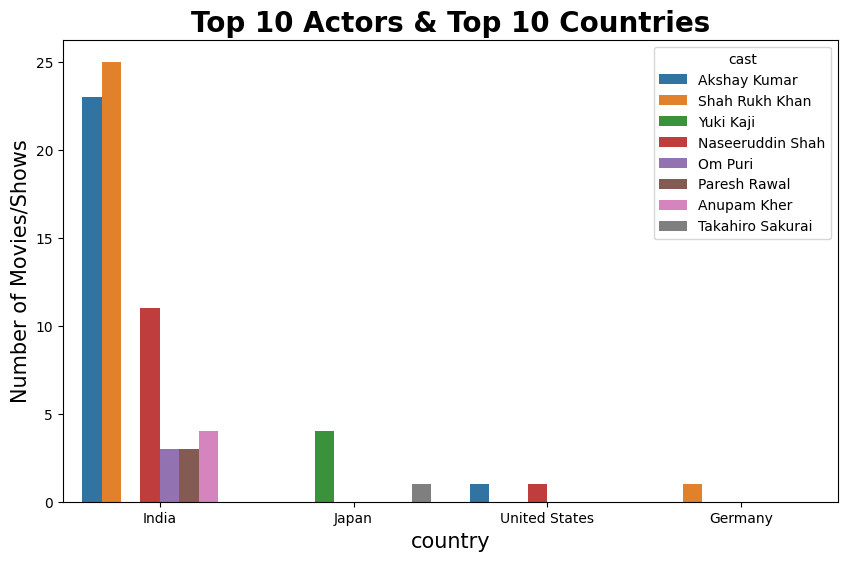

In [181]:
# Top 10 Actors from top 10 countries
fg = plt.figure(figsize=(10,6))

sns.countplot(data=dcc,x='country',hue='cast')
plt.title('Top 10 Actors & Top 10 Countries',fontsize=20,weight='bold')
plt.xlabel('country',fontsize = 15)
plt.ylabel('Number of Movies/Shows',fontsize = 15)
# plt.legend(['Kids','Mature','Adolescent'],frameon=False)
plt.show()

In [182]:
dc = df.copy()

In [183]:
dc['country'] = dc['country'].str.split(',')

# Separating different countries with explode function
dc = dc.explode('country')

# Dropping Nan Values
dc.dropna(subset=['country'],inplace=True)

# Removing left white space
dc['country'] = dc['country'].apply(lambda x: x.lstrip())

In [184]:
# Splitting elements by ','
dc['listed_in'] = dc['listed_in'].str.split(',')

# Separating different elements with explode function
dc = dc.explode('listed_in')

# Dropping Nan Values
dc.dropna(subset=['listed_in'],inplace=True)

# Removing left white space
dc['listed_in'] = dc['listed_in'].apply(lambda x: x.lstrip())
# Replacing the repeated names and merging the category
dc['listed_in'] = dc['listed_in'].apply(lambda x:'Movies' if 'Movies' in x else 'Dramas' if  'Dramas' in x else 'TV Shows' if 'TV Shows' in x else 'Comedies' if 'Comed' in x else 'Action & Adventure' if 'Adventure' in x else 'Thrillers' if 'Thriller' in x else 'Sci-Fi & Fantasy' if 'Fantasy' in x else 'Anime' if 'Anime' in x else x)

In [185]:
dc = dc.query("country == ['United States','India','United Kingdom','Canada','Germany']")

In [186]:
# Most favourable content
Country_content = pd.DataFrame(dc[['country','listed_in']].value_counts()).reset_index()
Country_content.columns = ['Country',"Content Type","Count"]
Country_content.head(10)

,Country,Content Type,Count
0,United States,Movies,1703
1,India,Movies,1247
2,United States,Comedies,1187
3,United States,Dramas,1067
4,India,Dramas,690
5,United States,Documentaries,512
6,United States,Action & Adventure,498
7,United Kingdom,TV Shows,413
8,United Kingdom,Movies,411
9,India,Comedies,358


Text(0, 0.5, 'Counts')

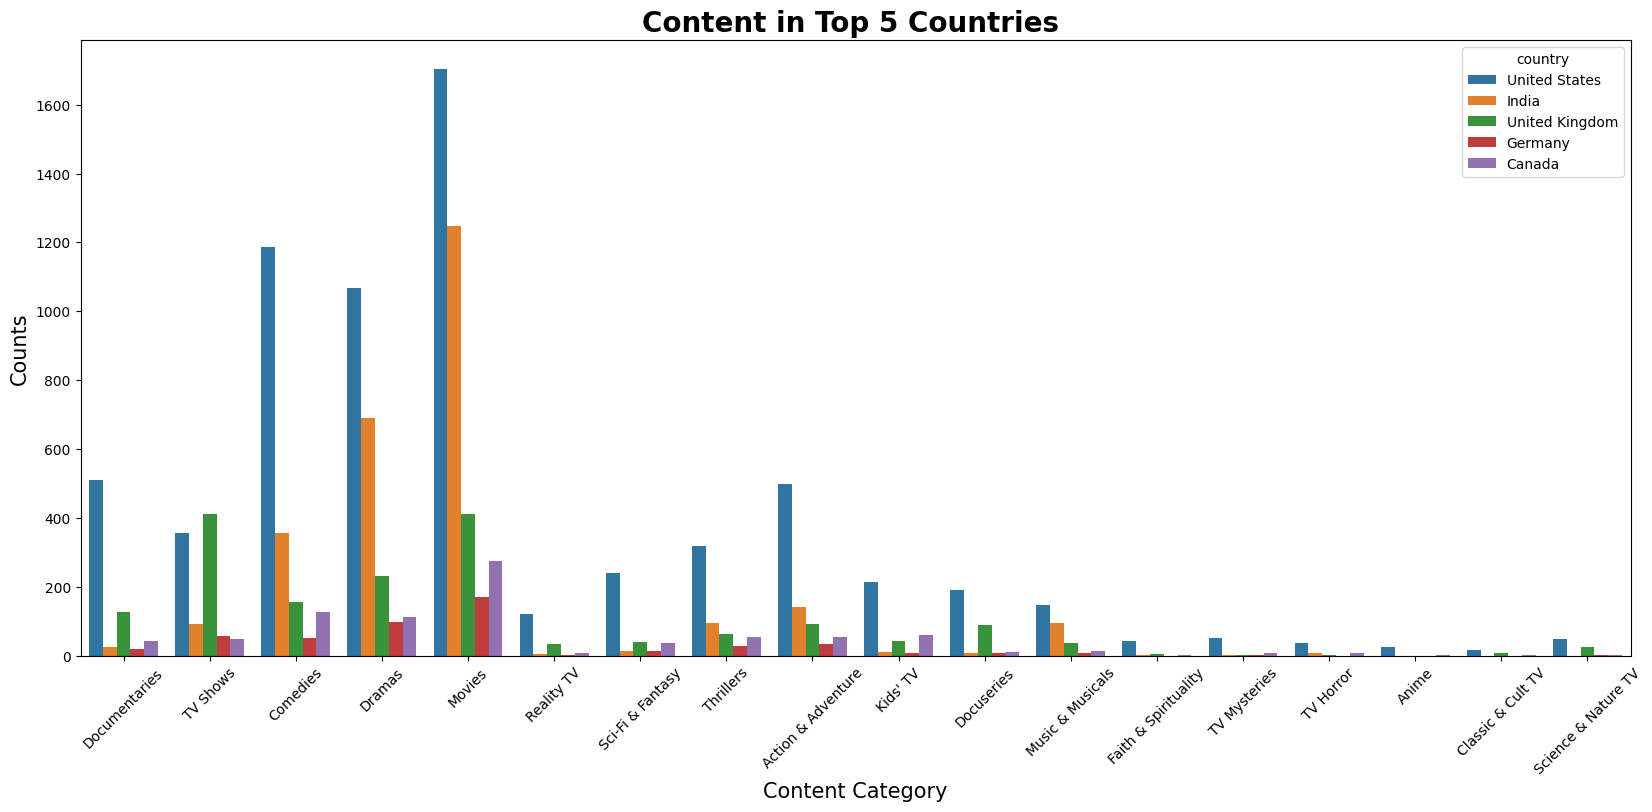

In [187]:
fg = plt.figure(figsize=(20,8))

sns.countplot(data=dc,hue='country',x='listed_in')
plt.xticks(rotation = 45)
plt.title('Content in Top 5 Countries ',fontsize=20,weight='bold')
plt.xlabel('Content Category',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)


- [x] Insights
> United States --> Movies, Comedies and Dramas are the top 3 content

> India  --> Movies, Dramas and Comedies are also for India

> United Kingdom --> TV Shows, Movies and Dramas

___

## Analysis of Top Content on the basis of Time

___

In [188]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [189]:
df.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

**TV Show Seasons**

In [190]:
dl = df.dropna(subset=['duration'])

In [191]:
dls = dl[dl['duration'].str.contains('Season')]

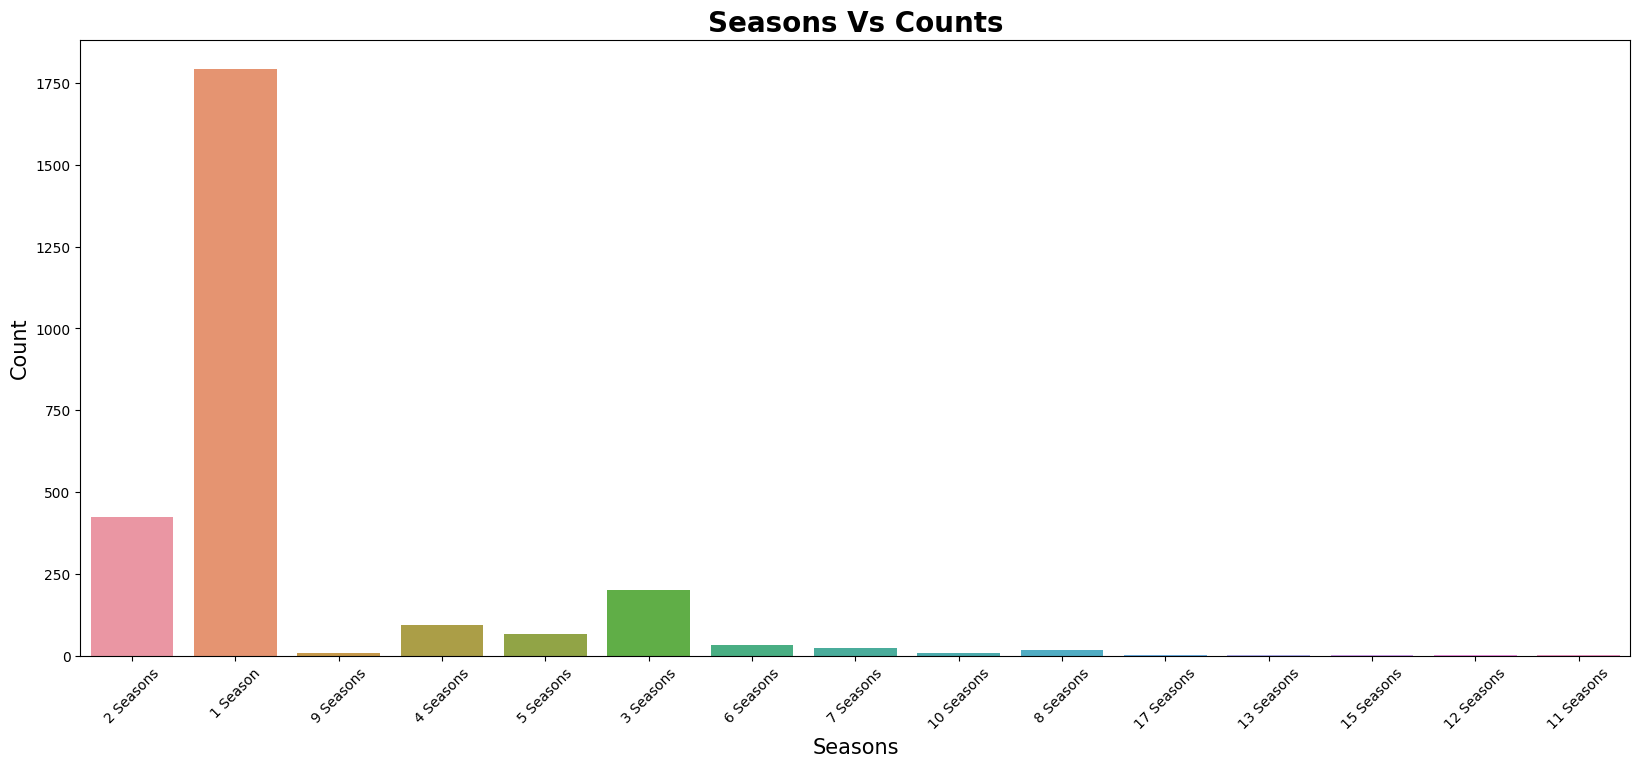

In [192]:
fg = plt.figure(figsize=(20,8))
sns.countplot(data=dls,x='duration')
plt.xticks(rotation = 45)
plt.title('Seasons Vs Counts',fontsize=20,weight='bold')
plt.xlabel('Seasons',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [193]:
dls[dls['duration'] == '17 Seasons']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_add
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021.0


- [x] Insights
> Maximum number of show availabe on netflix is of 1 Season, followed by 2 Seasons and 3 Seasons.

> Show title with Name **Grey's Anatomy** have maximum number of seasons produced in United States.

In [194]:
# Copying dataframe to new variable
dlx = dl.copy()

In [195]:
# removing min from the movies duration to make it into integers
dlx['Movie'] = dlx['duration'].apply(lambda x: x.strip(' min') if 'min' in x else 0)

In [196]:
# removing Seasons from TV Shows duration to make it into integers
dlx['Seasons'] = dlx['duration'].apply(lambda x: x.strip(' Seasons') if 'Seasons' in x else 0)

In [197]:
# converting objects into integer
dlx['Seasons'] = dlx['Seasons'].astype(int)
dlx['Movie'] = dlx['Movie'].astype(int)

In [198]:
# Here 0 indicates number of TV shows, whereass all values greater than 0 indicated movies length in minutes
dlx.Movie.value_counts().head(20)

0      2676
90      152
97      146
94      146
93      146
91      144
95      137
96      130
92      129
102     122
98      120
99      118
101     116
88      116
103     114
106     111
100     108
89      106
104     104
86      103
Name: Movie, dtype: int64

In [199]:
dlx['movie_cat'] = dlx['Movie'].apply(lambda x:'Category 4' if x >= 300 else 'Category 3' if x >= 200 and x < 300 else 'Category 2' if x >=100 and x < 200 else 'Category 1')

In [203]:
dls = dlx[dlx['Movie'] > 100]

Text(0.5, 1.0, 'Length of movies vs Category')

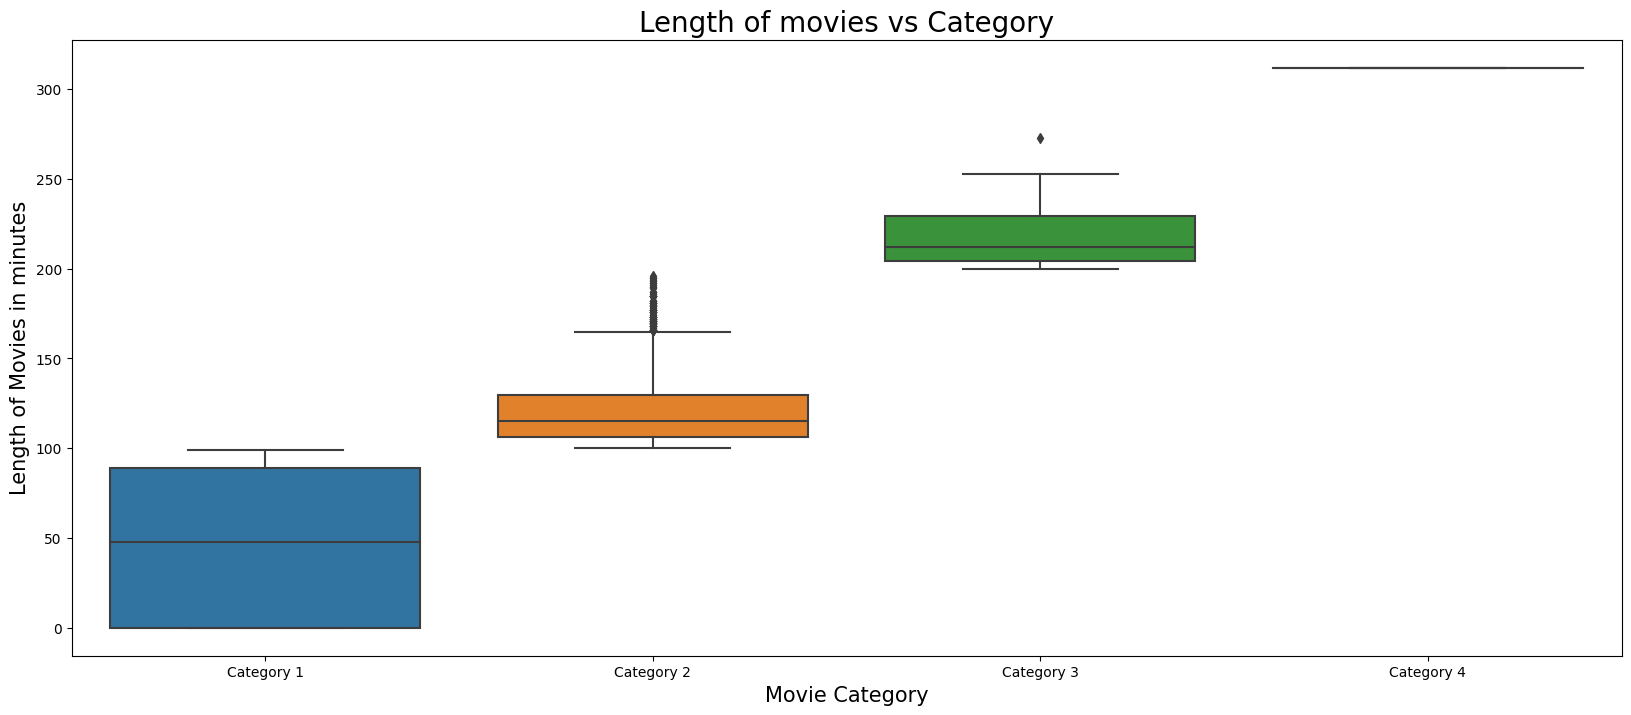

In [204]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(data=dlx,x='movie_cat',y='Movie')
plt.xlabel('Movie Category',fontsize=15)
plt.ylabel('Length of Movies in minutes',fontsize=15)
plt.title('Length of movies vs Category',fontsize=20,weight=20)

- [x] Insights
> There are maximum movies with duration of 100 mintues and below

___

___

In [205]:
a = dlx.corr(numeric_only=True)

Text(0.5, 1.0, 'Heatmap Showing relation between columns')

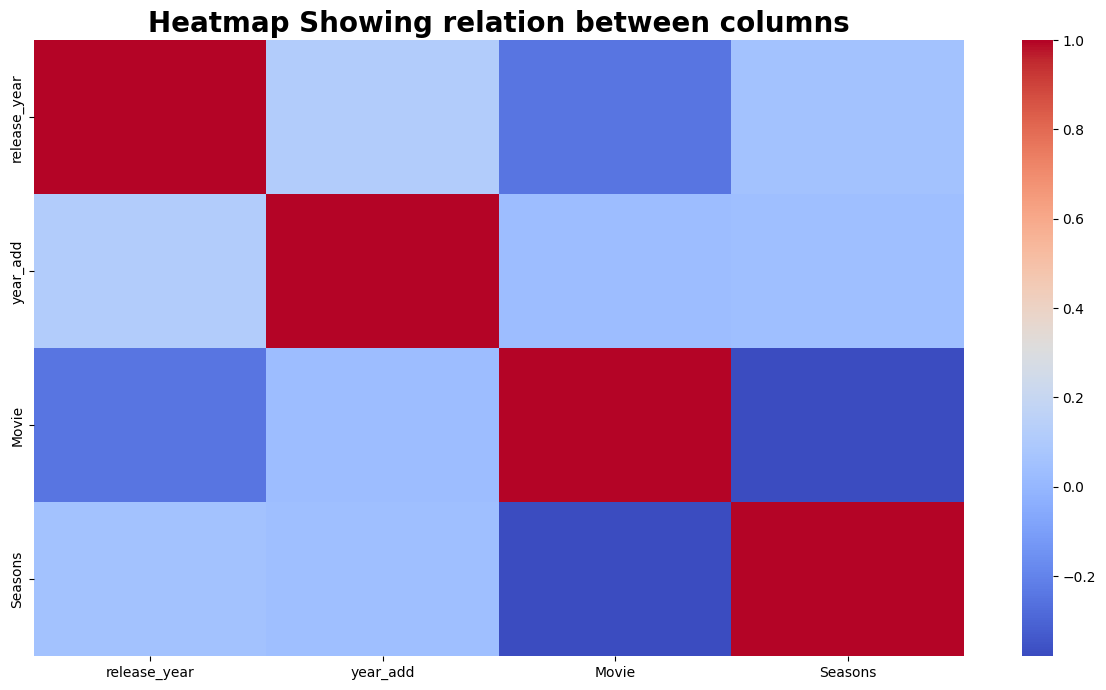

In [206]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(a,cmap='coolwarm')
plt.title('Heatmap Showing relation between columns',fontsize=20,weight='bold')

- [x] Insights

* **Season & Release Year**    ---> The value is very close to 0, So there is no relation between them
* **Movie & Release Year**     ---> The value is beyond -0.2 and very close to -0.3 which shows it has negative correlation between them.
* **year_add & Release Year**  ---> Again, 0 signifies no correlation
* **release_year with itself** ---> Shows very high correlation, which is obvious

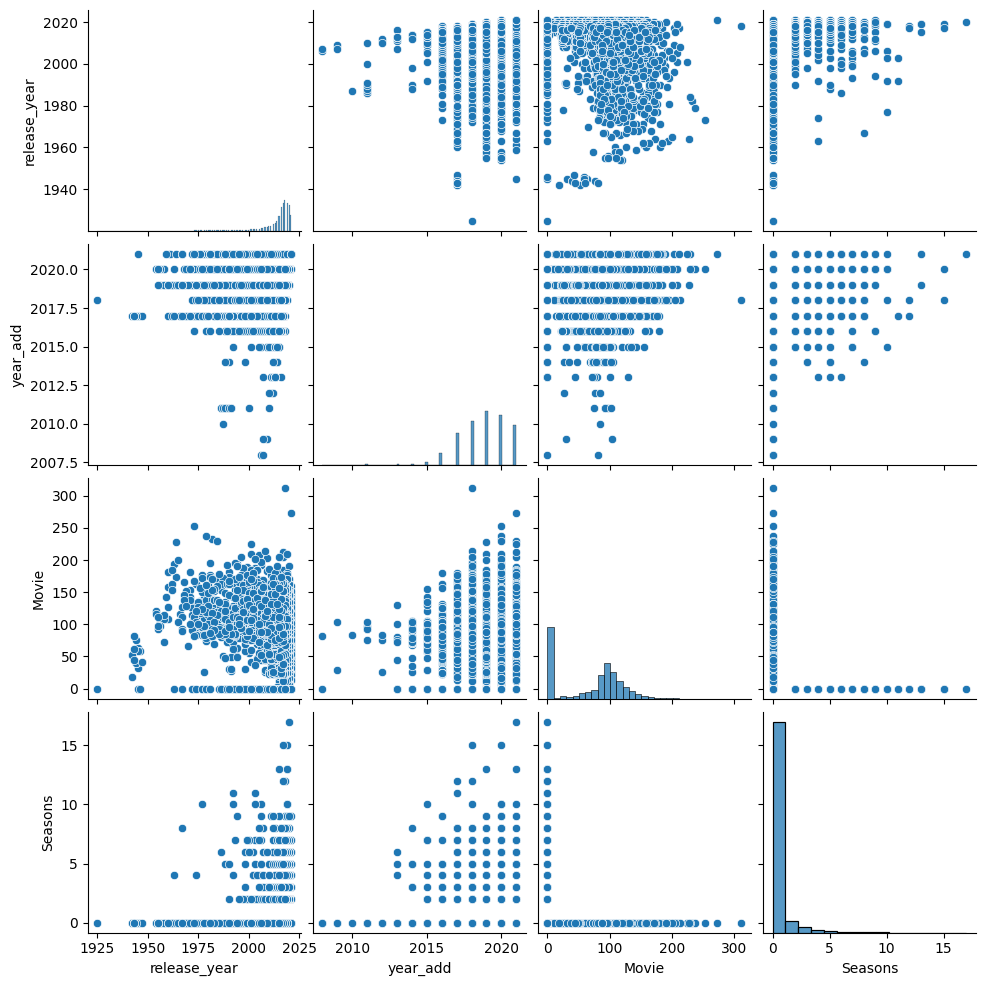

In [207]:
# Pairplot between Movies, Release Year and Date added
sns.pairplot(data=dlx)
plt.show()

___
___

## Business Insights

1) More than **50%** of movies/shows added to the platform within 5 years of release.
   > * This shows, Netflix is doing best to cater the needs of user

2) The best time to launch a show is in **December** whereas, the best day is **Friday**.
   > * This could be due to **holiday** as users have enough amount of time to spend on their favorite shows.
    
    
3)  Most famous directors --> **Rajiv Chilaka, Raúl Campos, Jan Suter, Marcus Raboy,Suhas Kadav**

4) Contents on the platform -->  **Mature > Adolescent > Kids**
    > * Most of the content belongs to Mature category

5) Most famous actors  --> **Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, Takahiro Sakurai**

6) Most of the content is added in 2019
    > * Netflix is continuously adding movies, but the rate of that increased heavily in 2019

7) Most famous Countries United States, India, United Kingdom, Canada, France
   > * **United States --> Movies, Comedies and Dramas are the top 3 content**
    >* **India --> Movies, Dramas and Comedies are also for India**
    >* **United Kingdom --> TV Shows, Movies and Dramas**

8)  Maximum number of show availabe on netflix is of 1 Season, followed by 2 Seasons and 3 Seasons.

	> * Show title with Name Grey's Anatomy have **17 Seasons** which is produced in United States.

9) There are maximum of movies with duration of **100 mintues** and below
    > * Movies having length near around 100 is performing good

___
___

## Recommendations

___

**1)** Time between Movie/TV Show release and uploaded to platform should be minimised.

**2)** It's good to launch movies in December and on Friday.

**3)** Consider adding movies/shows of actors and director who are performing best in the world.

**4)** Movies, Dramas and Comedies are top performer, it will be good if we add more of these.

**5)** Top 3 countries in overall terms is United States, India and United Kingdom. It would be good if Netflix focus on these countries. In addition, it could also increase it's reach in countries like Canada and France.


___
___
___